# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Big Data Real-Time Analytics com Python e Spark</font>

<br><br>

# <center>Mini-Projeto 1 </center>
## Modelagem Preditiva para Identificação de Risco de Doença Hepática

<br>

### Etapas:

- Construção, Treinamento, Avaliação e Seleção de Modelos para <u>Classificação</u>

### Introdução:
- Vamos trabalhar agora em nosso primeiro Mini-Projeto de Machine Learning, cujo objetivo é fornecer um passo a passo completo do processo de construção, treinamento, avaliação e seleção de modelos para classificação. Este projeto será abordado de maneira integral, desde a definição do problema de negócio até as previsões com o modelo treinado.

### Contexto:

- O número de pacientes com doença hepática tem aumentado continuamente devido a fatores como consumo excessivo de álcool, inalação de gases nocivos, ingestão de alimentos contaminados, e uso de drogas e anabolizantes. Em resposta a essa crescente preocupação de saúde pública, este mini-projeto visa construir um modelo de Machine Learning capaz de prever se um paciente irá ou não desenvolver uma doença hepática com base em várias características clínicas e demográficas. Este modelo pode ser extremamente útil para médicos, hospitais ou governos no planejamento de orçamentos de saúde e na criação de políticas de prevenção eficazes.

<br>

### Sobre os Dados:

https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset)

- Os dados para este projeto são provenientes do "Indian Liver Patient Dataset", disponível no link acima. Este conjunto de dados contém registros de pacientes hepáticos e não hepáticos coletados na Índia. A coluna "Dataset" atua como um rótulo de classe, dividindo os indivíduos em pacientes com doença hepática (1) ou sem a doença (2).

<br>
<table border="2">
  <tr>
    <th style="text-align: center; font-size: 16px;">Nome da Coluna</th>
    <th style="text-align: center; font-size: 16px;">Tipo de Dado</th>
    <th style="text-align: center; font-size: 16px;">Descrição</th>
  </tr>
  <tr>
    <td>Age</td>
    <td>Int</td>
    <td>Idade do paciente em anos.</td>
  </tr>
  <tr>
    <td>Gender</td>
    <td>Character(1)</td>
    <td>Gênero do paciente, representado como 'Male' ou 'Female'.</td>
  </tr>
  <tr>
    <td>Total_Bilirubin</td>
    <td>Float</td>
    <td>Total de bilirrubina no sangue, medido em mg/dL.</td>
  </tr>
  <tr>
    <td>Direct_Bilirubin</td>
    <td>Float</td>
    <td>Bilirrubina direta no sangue, medido em mg/dL.</td>
  </tr>
  <tr>
    <td>Alkaline_Phosphotase</td>
    <td>Int</td>
    <td>Nível de fosfatase alcalina no sangue, medido em IU/L.</td>
  </tr>
  <tr>
    <td>Alamine_Aminotransferase</td>
    <td>Int</td>
    <td>Nível de alanina aminotransferase no sangue, uma enzima hepática, medido em IU/L.</td>
  </tr>
  <tr>
    <td>Aspartate_Aminotransferase</td>
    <td>Int</td>
    <td>Nível de aspartato aminotransferase no sangue, uma enzima hepática, medido em IU/L.</td>
  </tr>
  <tr>
    <td>Total_Protiens</td>
    <td>Float</td>
    <td>Total de proteínas no soro do sangue, medido em g/dL.</td>
  </tr>
  <tr>
    <td>Albumin</td>
    <td>Float</td>
    <td>Nível de albumina no sangue, medido em g/dL.</td>
  </tr>
  <tr>
    <td>Albumin_and_Globulin_Ratio</td>
    <td>Float</td>
    <td>Razão entre albumina e globulina no sangue, um indicativo de função hepática.</td>
  </tr>
  <tr>
    <td>Dataset</td>
    <td>Int</td>
    <td>Variável alvo, indicando presença (1) ou ausência (2) de doença hepática.</td>
  </tr>
</table>



<br>

### Objetivo:

- Nosso **objetivo** é prever uma classe (sim ou não), usaremos aprendizado supervisionado para **classificação**,   criando   diferentes   versões   do   modelo   com   diferentes algoritmos e passaremos por todo o processo de Machine Learning de ponta a ponta. Usaremos como fonte de dados o dataset disponível no link a seguir.




<br><br><br>
## Importando Pacotes

In [1]:
# Manipulação de Dados
import numpy as np
import pandas as pd

# Criação e Visualização de Gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Carrega a função SMOTE (Balanceamento de Classes)
import imblearn
from imblearn.over_sampling import SMOTE

# Pacote do Python para Machine Learning
import sklearn

# Função model_selection do pacote sklearn
from sklearn.model_selection import train_test_split    # dividir os dados em treino e teste
from sklearn.model_selection import GridSearchCV        # técnica de utilização de hiperparâmetros
from sklearn.model_selection import RandomizedSearchCV  # técnica de utilização de hiperparâmetros
from sklearn.model_selection import cross_val_score     # validação cruzada (para avaliação do modelo)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


## Pacotes do sklearn com os Algoritmos

# Função com Algoritmo de ML (Regressão Logística)
from sklearn.linear_model import LogisticRegression     

# Função com Algoritmo de ML (RandomForest)
from sklearn.ensemble import RandomForestClassifier

# Função com Algoritmo de ML (KNN)
from sklearn.neighbors import KNeighborsClassifier

# Função com Algoritmo de ML (Árvores de Decisão)
from sklearn.tree import DecisionTreeClassifier

# Função com Algoritmo de ML (SVC)
from sklearn.svm import SVC

# Calcular as Métricas para Avaliação dos Modelos
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score

# Salvar o modelo após o treinamento
import joblib
import pickle

# Indicando que os Gráficos apareçam no Jupyter Notebook
%matplotlib inline

# Mensagens de Aviso
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Carrega os dados
dados = pd.read_csv('dados/dataset.csv')

In [3]:
# Shape
dados.shape

(583, 11)

<br><br>
# Carregando o Conjunto de Dados
- Nesta etapa é feito o **carregamento** dos dados.

<br>

In [4]:
# Nome Colunas
dados.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [5]:
# Visualiza uma Amostra
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
356,33,Male,0.7,0.2,256,21,30,8.5,3.9,0.80,1
202,38,Female,0.8,0.2,145,19,23,6.1,3.1,1.03,2
372,48,Male,0.7,0.2,326,29,17,8.7,5.5,1.70,1
433,41,Female,0.9,0.2,201,31,24,7.6,3.8,1.00,2
225,26,Male,0.6,0.2,120,45,51,7.9,4.0,1.00,1


<br><br>
# Análise Exploratória de Dados
- Nesta etapa verificamos o **tipo dos dados**, **correlações** e **interpretação** dos dados.

<br><br>

#### Verificando Tipo de Dados

In [6]:
# Tipo de Dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


#### Visualizando Variáveis Categóricas e Numéricas

In [7]:
# Exibindo Variáveis Categóricas (filtrando)
dados.dtypes[dados.dtypes == 'object']

Gender    object
dtype: object

In [8]:
# Exibindo Variáveis Numéricas (filtrando)
dados.dtypes[dados.dtypes != 'object']

Age                             int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

<br><br>

## Explorando Variáveis Numéricas

#### Resumo Estatístico

In [9]:
# Describe
dados.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


<br>

#### Visualizando através de Gráficos

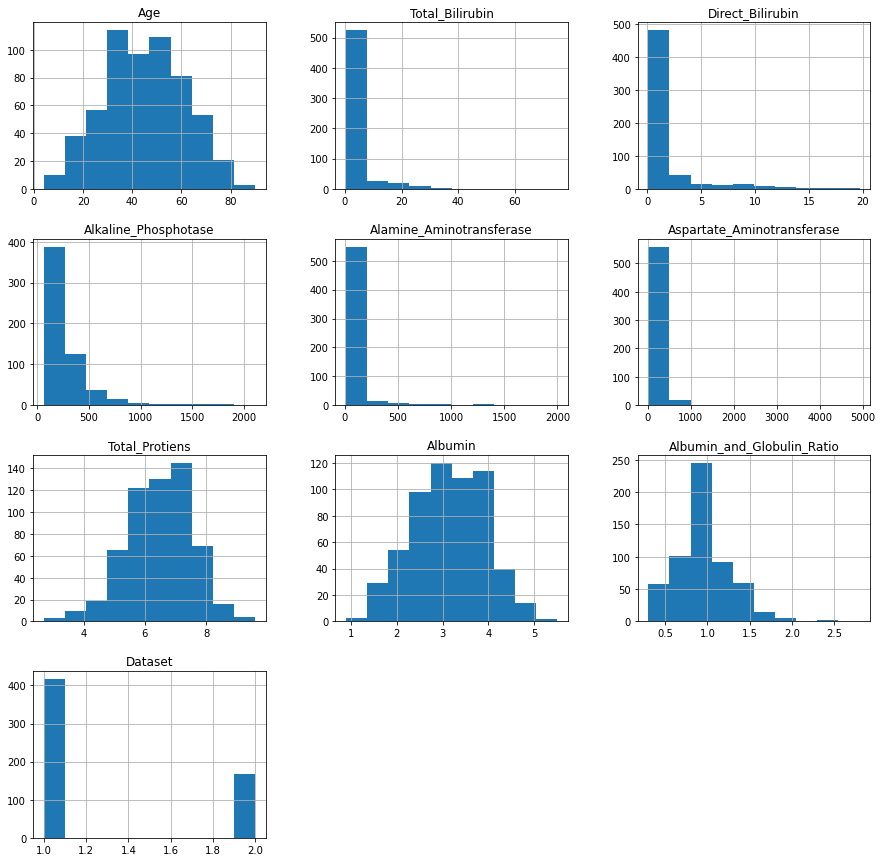

In [10]:
# Plot
dados.hist(figsize = (15,15), bins = 10) 
plt.show()

#### Interpretando o Resumo e Gráficos

- Parece que há outlier nas variáveis **Alamine_Aminotransferase**, **Aspartate_Aminotransferase**, pois o valor máximo é muito mais alto que o valor médio.
- A coluna **Dataset** (que será posteriormente renomeada para Target) tem '1' para doença hepática e '2' para nenhuma doença hepática. Vamos ajustar a variável colocando valores mais fáceis de interpretar. A classe negativa (não tem a doença) será zero.

<br>

#### Ajustando coluna 'Dataset' (editando valores e renomeando para 'Target')

In [11]:
# Criando Função para ajustar a variável target (modificando todos valores 2 para 0)
def ajusta_var(x):
    if x == 2:
        return 0
    return 1

# Aplica a função
dados['Dataset'] = dados['Dataset'].map(ajusta_var)

In [12]:
# Renomeando coluna 'Dataset' para 'Target'
dados.rename({'Dataset':'Target'}, axis = 'columns', inplace = True)

In [13]:
# Visualizando
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
571,90,Male,1.1,0.3,215,46,134,6.9,3.0,0.7,1
91,60,Male,6.8,3.2,308,404,794,6.8,3.0,0.7,1
75,29,Female,0.7,0.1,162,52,41,5.2,2.5,0.9,0
64,57,Male,1.3,0.4,259,40,86,6.5,2.5,0.6,1
47,40,Male,1.1,0.3,230,1630,960,4.9,2.8,1.3,1


<br>

### Exploração Variável Categórica

<br>

In [14]:
# Info
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


#### Resumo

In [15]:
# Describe (informando que é para somente variáveis categóricas)
dados.describe(include = ['object'])

,Gender
count,583
unique,2
top,Male
freq,441


In [16]:
# Verificando Tipo de Valores
dados['Gender'].unique()

array(['Female', 'Male'], dtype=object)

#### Visualizando através de Gráfico

Número de pacientes do sexo masculino:  441
Número de pacientes do sexo feminino:  142


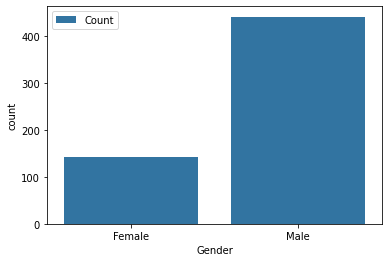

In [17]:
# Plot
sns.countplot(data = dados, x = 'Gender', label = 'Count')

# Value counts
M, F = dados['Gender'].value_counts()

# Print
print('Número de pacientes do sexo masculino: ', M)
print('Número de pacientes do sexo feminino: ', F)

### Aplicando Label Encoding
#### Vamos transformar a variável **Categórica** Gender na sua represetação **Numérica**

In [18]:
# Função para label encoding ('Male' = 0 e 'Female' = 1)
def encoding_func(x):
    if x == 'Male':
        return 0
    return 1

# Aplica a função
dados['Gender'] = dados['Gender'].map(encoding_func)

In [19]:
# Visualiza os dados
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
230,61,0,1.5,0.6,196,61,85,6.7,3.8,1.30,0
574,32,0,12.1,6.0,515,48,92,6.6,2.4,0.50,1
454,28,0,0.6,0.2,159,15,16,7.0,3.5,1.00,0
422,41,0,1.2,0.5,246,34,42,6.9,3.4,0.97,1
365,40,0,0.7,0.2,176,28,43,5.3,2.4,0.80,0


<br>

### Verificando Correlação Entre os Atributos 

#### Tabela Correlação

In [20]:
#### Correlação
dados.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,-0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


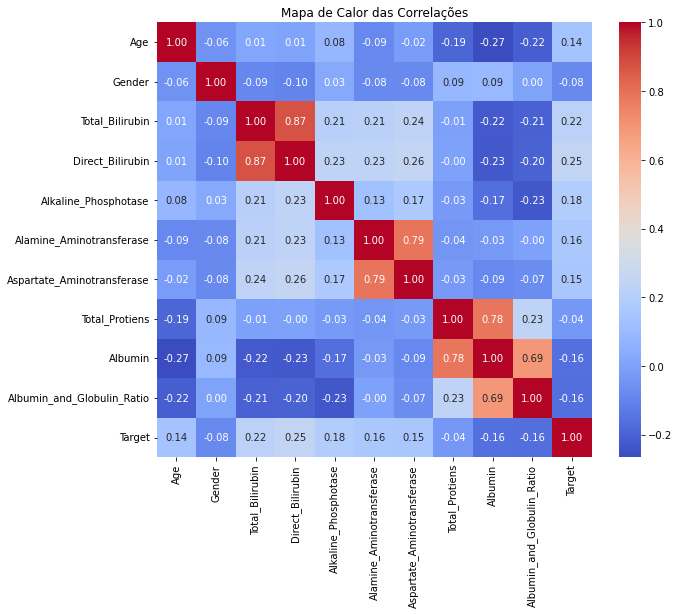

In [21]:
# Visualizando através de Gráfico

# Criando o heatmap
corr_matrix = dados.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10, 8))  # Define o tamanho da figura
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Mapa de Calor das Correlações')
plt.show()

#### Interpretando o resultado da Correlação
- Vamos citar exemplo: Podemos constatar no dados e gráfico que a variável **Total_Bilirubin** tem uma alta correlação positiva com a variável **Direct_Bilirubin** (0.87).
- Isso é um problema pois a mesma informação está sendo replicada duas vezes e por conta disso pode deixar o modelo tendencioso.
- O fato de duas variáveis estarem altamente relacionadas (quando tem o valor abaixo ou acima de 0.70) é chamado de **Multicolinearidade**.
- Em algum momento deveremos tomar uma decisão: deixar as duas variáveis, remover uma variável ou remover as duas.


#### Atenção
- Nosso dados ainda não foram **limpos**/**tratados** (valores ausentes, replicados ou outliers). É recomendado aplicar algum tipo de tratamento relacionado a **Multicolinearidade** somente quando os dados estiverem tratados.
- Estamos na etapa de **Análise Exploratória** onde estamos entendendo a natureza dos nossos dados.

<br>

#### Verificando Através de Gráfico a Relação entre as Variáveis 'Direct_Bilirubin' e 'Total_Bilirubin' por 'Target'

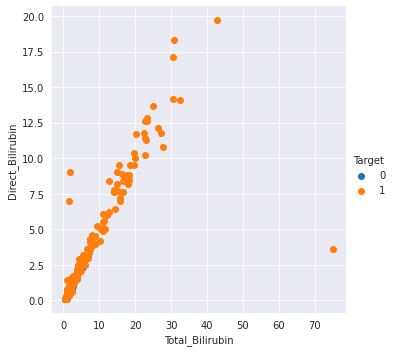

In [22]:
# Define o estilo do background
sns.set_style('darkgrid')

# FacetGrid
grid = sns.FacetGrid(dados, hue='Target', height=5)                       # Alterado de 'size' para 'height'
grid.map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()
plt.show()  # Garante que o gráfico será mostrado em alguns ambientes

<br>

#### Verificando Através de Gráfico a Relação entre as Variáveis 'Direct_Bilirubin' e 'Total_Bilirubin' por 'Gender'

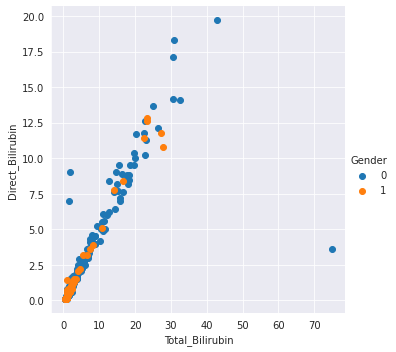

In [23]:
# Define o estilo do background
sns.set_style('darkgrid')

# FacetGrid
grid = sns.FacetGrid(dados, hue='Gender', height=5)                      
grid.map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()
plt.show()

<br>

#### Verificando Através de Gráfico a Relação entre as Variáveis 'Albumin' e 'Total_Bilirubin' por 'Target'

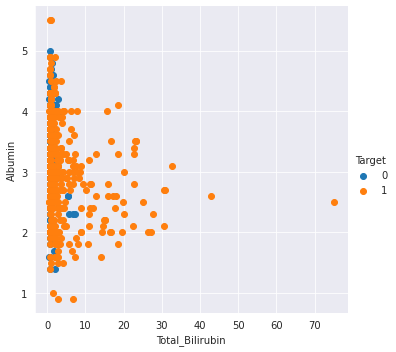

In [24]:
# Define o estilo do background
sns.set_style('darkgrid')

# FacetGrid
grid = sns.FacetGrid(dados, hue='Target', height=5)                      
grid.map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()
plt.show()

<br>

#### Verificando Através de Gráfico a Relação entre as Variáveis 'Albumin' e 'Total_Bilirubin' por 'Gender'

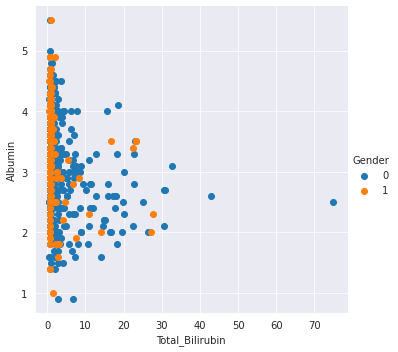

In [25]:
# Define o estilo do background
sns.set_style('darkgrid')

# FacetGrid
grid = sns.FacetGrid(dados, hue='Gender', height=5)                      
grid.map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()
plt.show()

<br>

### Conclusões da Análise Exploratória

- A análise exploratória ajudou a entender a natureza dos dados, preparando o caminho para limpeza de dados e análises mais profundas.
- Identificou-se a necessidade de tratar valores ausentes e possíveis outliers.
- A análise de correlação destacou a presença de multicolinearidade, que pode afetar a performance de modelos de aprendizado de máquina.

<br><br>

<br>

# Limpeza de Dados
- Nesta etapa realizaremos a verificação e tratamento de **valores ausentes, duplicados e outliers**.

<br>

<br>

## Verificação de Valores Ausentes

#### Verificando Valores Ausentes

In [26]:
# Verifica se há valores ausentes (por coluna)
dados.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64

In [27]:
# Exibe as linhas com os valores ausentes
dados[dados.isnull().values]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
209,45,1,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,0,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,1,0.6,0.2,180,12,15,5.2,2.7,NaN,0
312,27,0,1.3,0.6,106,25,54,8.5,4.8,NaN,0


<br>

## Verificação de Valores Duplicados

#### Verificando Valores Duplicados

In [28]:
# Verifica quantidade de valores duplicados
dados.duplicated().sum()

13

In [29]:
# Exibindo as linhas com valores duplicados
dados[dados.duplicated(keep = False)]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
18,40,1,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,1,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,0,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,0,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80,0
34,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80,0
54,42,0,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,0,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,0,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,0,1.0,0.5,158,37,43,7.2,3.6,1.00,1


#### Tratando Valores Duplicados

In [30]:
# Remove registros duplicados (remove uma das duplicatas)
dados = dados.drop_duplicates()
print(dados.shape)

(570, 11)


#### Confirmando o Tratamento de Valores Ausentes e Duplicatas

In [31]:
# Verifica se há valores ausentes (por coluna)
print(dados.isna().sum())

print('\n--------------------------------------------------------\n')

# Verifica se há valores duplicados
print(dados.duplicated().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64

--------------------------------------------------------

0


<br>

## Verificação de Valores Outliers
- Vamos verificar e tratar valores outliers dentro de **dois cenários** e tomaremos decisões **diferentes** para cada um deles.

<br>

### Cenário 1 (Variável 'Alamine_Aminotransferase')

In [32]:
# Verificando Describe
dados.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,566.000000,570.000000
mean,44.849123,0.245614,3.321754,1.497544,291.750877,79.728070,109.380702,6.496316,3.148947,0.948004,0.712281
std,16.242182,0.430829,6.267941,2.833231,245.291859,181.471697,290.880671,1.088300,0.796813,0.319635,0.453097
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.000000,86.750000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


#### Analisando o describe da variável Alamine_Aminotransferase
- Podemos observar que a variável possui uma média de **80.14** e um valor máx de **2000**. Isso é um sinal de que podemos ter um **outlier**.
- Podemos checar esta informação através da criação de um **Gráfico BoxPlot**.

#### Gráfico BoxPlot (Variável 'Alamine_Aminotransferase')

<Axes: ylabel='Alamine_Aminotransferase'>

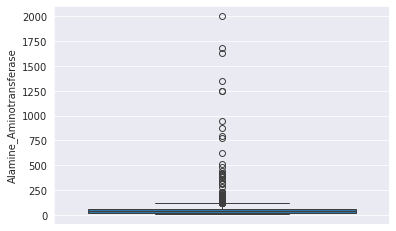

In [33]:
# Boxplot
sns.boxplot(dados.Alamine_Aminotransferase)

#### Interpretando o gráfico
- Podemos verificar que além do valor de 2000 temos **outros diversos valores acima da média** (que está próxima de zero).
- Será que os valores extremos são mesmo outliers para esta variável?
<br><br>
- Para determinar se os valores extremos são outliers, vamos verificar não apenas os valores individuais mais altos, mas também a **frequência** desses valores extremos para entender melhor sua distribuição e impacto.
<br>

#### Contagem de Frequência por Valor

In [34]:
# Exibindo os cinco maiores valores únicos e suas frequências:
valores_extremos = dados['Alamine_Aminotransferase'].nlargest(5).unique()
frequencias = dados['Alamine_Aminotransferase'].value_counts().loc[valores_extremos]
print("Os cinco maiores valores e suas frequências são:")
print(frequencias)

Os cinco maiores valores e suas frequências são:
Alamine_Aminotransferase
2000    1
1680    1
1630    1
1350    1
1250    2
Name: count, dtype: int64


In [35]:
# Exibindo a quantidade de valores acima da média:

# Cálculo da média
media = dados['Alamine_Aminotransferase'].mean()

# Contagem de valores acima da média
total_acima_media = (dados['Alamine_Aminotransferase'] > media).sum()

print("Total de valores acima da média:", total_acima_media)
print("Total de valores na variável:", len(dados['Alamine_Aminotransferase']))


Total de valores acima da média: 106
Total de valores na variável: 570


## Conclusão
- Após a análise detalhada da variável **'Alamine_Aminotransferase'**, identificamos que o valor máximo de 2000 é consideravelmente mais alto que os outros valores próximos, que também são altos mas menos frequentes. 
- Esses valores extremos podem ser considerados **outliers** devido ao seu afastamento significativo da média e mediana, além de, com **110** registros, serem **frequentes** no dataset, como mostrado pela **análise de frequência**.

<br>

- Dado esse contexto, é sugerido a avaliação de **tratamento** desses outliers dentro do cenário de aplicação dos dados. Se estes valores são resultantes de erros de medição ou casos muito atípicos que podem distorcer análises estatísticas, a **remoção** ou **substituição** por um limite superior calculado pelo **método do IQR** é recomendada.
- Contudo, se esses altos valores representam casos **válidos** dentro da pesquisa ou aplicação prática dos dados, poderiam ser **mantidos**, mas com uma análise adicional para confirmar sua validade.

<br>

- Portanto neste **caso específico**, após verificar a **validade** dos dados, optou-se por **não realizar o tratamento de outliers** para esta variável, pois eles representam casos autênticos dentro do contexto estudado.

<br><br>

### Cenário 2 (Variável 'Aspartate_Aminotransferase')

In [36]:
# Verificando o Describe da variável
dados['Aspartate_Aminotransferase'].describe()

count     570.000000
mean      109.380702
std       290.880671
min        10.000000
25%        25.000000
50%        41.000000
75%        86.750000
max      4929.000000
Name: Aspartate_Aminotransferase, dtype: float64

#### Analisando o describe da variável Aspartate_Aminotransferase
- Podemos observar que a variável possui uma média de **109.89** e um valor máx de **4929**. Isso é um sinal de que podemos ter um ou mais valores **outlier**.
- Vamos novamente verificar por um **Gráfico BoxPlot**

#### Gráfico BoxPlot (Variável 'Aspartate_Aminotransferase')

<Axes: ylabel='Aspartate_Aminotransferase'>

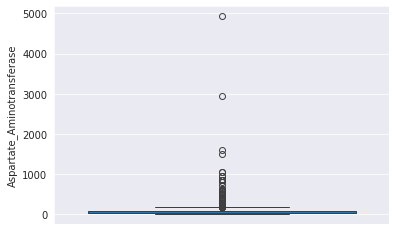

In [37]:
# Boxplot
sns.boxplot(dados.Aspartate_Aminotransferase)

#### Interpretando o gráfico
- Podemos verificar que novamente temos valores outliers, mas com um **comportamente diferente**. Parece que temos menos dados com valores extremos.
- Aqui nós temos apenas **dois valores** outliers **acima de 2000** enquanto todos os outros abaixo deste valor. 
- Os valores extremos são mesmo outliers para esta variável?
<br><br>
- Podemos responder isso verificando novamente os **maiores valores únicos** e suas **frequências**:
<br>

#### Contagem de Frequência por Valor

In [38]:
# Exibindo os cinco maiores valores únicos e suas frequências:
valores_extremos = dados['Aspartate_Aminotransferase'].nlargest(5).unique()
frequencias = dados['Aspartate_Aminotransferase'].value_counts().loc[valores_extremos]
print("Os cinco maiores valores e suas frequências são:")
print(frequencias)

Os cinco maiores valores e suas frequências são:
Aspartate_Aminotransferase
4929    1
2946    1
1600    1
1500    1
1050    2
Name: count, dtype: int64


In [39]:
# Exibindo a quantidade de valores acima da média:

# Cálculo da média
media = dados['Aspartate_Aminotransferase'].mean()

# Contagem de valores acima da média
total_acima_media = (dados['Aspartate_Aminotransferase'] > media).sum()

print("Total de valores acima da média:", total_acima_media)
print("Total de valores na variável:", len(dados['Aspartate_Aminotransferase']))

Total de valores acima da média: 108
Total de valores na variável: 570


In [40]:
# Exibindo a quantidade de valores acima de 2000:
quantidade_acima_2000 = sum(dados['Aspartate_Aminotransferase'] > 2000)

# Imprimindo o resultado
print(f"Quantidade de valores acima de 2000: {quantidade_acima_2000}")

Quantidade de valores acima de 2000: 2


#### Conclusão
- Vamos aplicar um tratamento para limpeza de outlier nesta variável.
- Como visto anteriormente, dentro dos **valores outliers**, temos somente **dois valores** acima de 2000 enquanto todos os outros abaixo deste valor. 
- Iremos **manter** no dataset todos os registros **abaixo** do valor 2500 para esta variável.

### Tratando Valores Outliers da Variável 'Alamine_Aminotransferase'

In [41]:
# Shape
dados.shape

(570, 11)

In [42]:
# Aplica tratamento mantendo somente os registros onde o valor for menor ou igual a 3000 e verifica shape
dados = dados[dados.Aspartate_Aminotransferase <= 3000]
dados.shape

(569, 11)

<Axes: ylabel='Aspartate_Aminotransferase'>

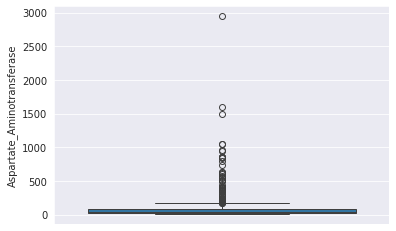

In [43]:
# Verifica Novamente o BoxPlot
sns.boxplot(dados.Aspartate_Aminotransferase)

In [44]:
# Aplica novo tratamento mantendo somente os registros onde o valor for menor ou igual a 2500 e verifica shape
dados = dados[dados.Aspartate_Aminotransferase <= 2500]
dados.shape

(568, 11)

<Axes: ylabel='Aspartate_Aminotransferase'>

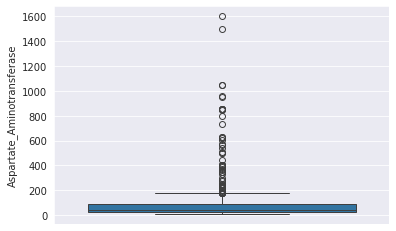

In [45]:
# Verifica Novamente o BoxPlot
sns.boxplot(dados.Aspartate_Aminotransferase)

In [46]:
# Verificando o Describe da variável
dados['Aspartate_Aminotransferase'].describe()

count     568.000000
mean       95.901408
std       171.956479
min        10.000000
25%        25.000000
50%        41.000000
75%        86.000000
max      1600.000000
Name: Aspartate_Aminotransferase, dtype: float64

<br>

- Podemos **observar** que agora os dados estão mais **concentrados** em torno da média e mediana, com uma redução significativa nos valores extremos, o que sugere uma distribuição mais normalizada e menos suscetível a distorções causadas por outliers.
- A **remoção** dos valores extremos acima de 2500 resultou em uma média reduzida de 96.32 e um novo máximo de 1600, demonstrando que o tratamento de outliers foi efetivo em mitigar impactos de valores anormalmente elevados. Essa limpeza ajuda a melhorar a precisão das análises e dos modelos de machine learning que serão construídos a partir desses dados.

<br><br>

### Tratando Valores Ausentes

- Em geral a **regra** é:
---> se a variável tiver **50%** ou mais de valores ausentes, ela precisa ser **deletada**.
---> se a variávei tiver em torno de **30%** de valores ausentes, então pode-se escolher uma estratégia de **imputação**. Caso a variável seja numérica, podemos **calcular** a média, extrair a mediana e preencher os valores ausentes com média e mediana. Caso a variável seja categórica, então usamos a **moda**.

In [47]:
dados.shape

(568, 11)

In [48]:
# Elimina as Linhas com Valores Ausentes em qualquer coluna (any) (Recomendado fazer após de tratamento de Outliers)
dados = dados.dropna(how = 'any')  

In [49]:
dados.shape

(564, 11)

In [50]:
# Visualiza Dados Aleatórios
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
478,33,0,7.1,3.7,196,622,497,6.9,3.6,1.09,1
333,36,1,0.7,0.2,152,21,25,5.9,3.1,1.10,0
325,42,0,0.8,0.2,158,27,23,6.7,3.1,0.80,0
332,26,0,7.1,3.3,258,80,113,6.2,2.9,0.80,1
52,38,0,3.1,1.6,253,80,406,6.8,3.9,1.30,1


<br><br>

# RESUMO

Antes de avançarmos para a **etapa final de pré-processamento de dados**, crucial para a construção de modelos de machine learning, vamos **recapitular** os passos já concluídos no projeto.:

- Primeiro foi definido o **problema de negócio** para saber o objetivo e o que temos que resolver.
- Depois nós **extraímos os dados** e nesta etapa pode ser que tenhamos o suporte de um Engenheiro de Dados. No caso deste projeto foi feito a leitura dos dados através de um arquivo csv.
- Na sequência foi feita a **Análise Exploratória** onde nós verificamos padrões, detectamos problemas, identifica coisas que precisamos fazer.
- Após isso é aplicado a **Limpeza de Dados** de acordo com as técnicas necessárias, estratégias e decisões.
- Sempre lembrar de **documentar** tudo o que foi feito em cada atividade.

<br><br>
# Pré-Processamento de Dados Para Construção de Modelos de ML

- Como vimos anteriormente ao aplicarmos o **mapa de correlação** as variáveis 'Direct_Bilirubin' e 'Total_Bilirubin' possuem uma **alta correlação**.
- Com isso foi tomada a decisão de **remover** umas das variáveis.

<br>

#### Removendo Variável 'Direct_Bilirubin'

In [51]:
# Dada a alta correlação entre as variáveis Direct_Bilirubin e Total_Bilirubin, vamos remover Direct_Bilirubin

print(dados.shape)
dados = dados.drop('Direct_Bilirubin', axis=1)
print(dados.shape)

(564, 11)
(564, 10)


<br>

## Dividindo os dados em Dados de Treino e Dados de Teste
- Nós **treinamos** o modelo com **dados de treino** e **avaliamos** o modelo com **dados de teste**.

#### Criando Dados de Treino e Teste

In [52]:
# Cria um objeto separado para a variável target
y = dados.Target

# Cria um objeto separadado para as variáveis de entrada
X = dados.drop('Target', axis = 1)

# Split em dados de treino e teste com amostragem estratificada
X_treino, X_teste, y_treino, y_teste = train_test_split(X, 
                                                        y, 
                                                        test_size = 0.25, 
                                                        random_state = 1234,
                                                        stratify = dados.Target)

#### Verificando shape

In [53]:
print(len(X_treino))
print(len(X_teste))

423
141


In [54]:
# Print do shape
print(X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape)

(423, 9) (141, 9) (423,) (141,)


<br>

# Balanceamento de Classes

In [55]:
# Value_Counts (contagem de quantos registros por categoria)
y_treino.value_counts()

Target
1    301
0    122
Name: count, dtype: int64

#### Por que realizar o Balanceamento de Classes ?
- Como foi observado no **value_counts()** acima podemos constatar que os dados estão **desbalanceados**, isso signifca que tem muito mais pacientes de uma classe do que da outra.
- E o que acontece quando não realizarmos o **balanceamento**? O modelo de ML **aprenderá** muito mais o **padrão** da Classe 1 do que da Classe 0.
- Caso não aplicamos técnica de Balanceamento, o modelo tende a ficar **tendencioso**. Por isso **precisamos** fazer o **Balanceamento de Classes**.

#### Estratégias para o Balanceamento

Temos duas estratégias: 
- **Reduzir** os registros da classe majoritária e assim diminuir consideravelmente o número de registros no nosso dataset.
- Aplicar a técnica de **Oversampling** onde irá ser **aumentado** o número de registros das classe minoritária. E como isso é feito? Sendo criado dados **sintéticos** com base nos dados existentes (para isso existe um pacote no Python para nos ajudar, o pacote imblearn com a função SMOTE).

<br>

#### Aplicando a Técnica de Oversampling

In [56]:
# Vamos aplicar a técnica de oversampling e aumentar o número de exemplos da classe minoritária
over_sampler = SMOTE(k_neighbors = 2)

# Aplica o oversampling (deve ser feito somente com dados de treino)
X_res, y_res = over_sampler.fit_resample(X_treino, y_treino)

<br>

#### Por que a técnica de oversamping dever se aplicada <u>somente</u> nos dados de treino?
- A técnica de **oversampling** deve ser aplicada somente nos dados de **treino** para evitar o **vazamento de dados (data leakage)** e garantir uma avaliação justa e realista do modelo durante o teste.
- Se o **balanceamento** fosse aplicado ao conjunto de dados completo, incluindo os dados de teste, o modelo poderia acabar sendo avaliado com dados sintéticos, não representativos da realidade, influenciando os resultados dos testes e comprometendo a capacidade de generalização do modelo para novos dados não vistos.
- Portanto, mantendo o conjunto de teste original, sem dados sintéticos, asseguramos que a performance do modelo reflete melhor sua eficácia em cenários reais.

<br>

In [57]:
# Verificando tamanho antigo x depois que os dados foram balanceados

print(len(X_treino))
print(len(y_treino))
print(len(X_res))
print(len(y_res))

423
423
602
602


O dataset de treino agora passou de 423 linhas para 602 linhas.

In [58]:
# Ajusta o nome do dataset de treino para X
X_treino = X_res
# Ajusta o nome do dataset de treino para y
y_treino = y_res

In [59]:
# Value_Counts (contagem de quantos registros por categoria)
y_treino.value_counts()

Target
1    301
0    301
Name: count, dtype: int64

<br>

# Padronização x Normalização

As técnicas de padronização e normalização são usadas no pré-processamento de dados em aprendizado de máquina para preparar variáveis numéricas, ajustando suas escalas. Aqui está quando e por que usar cada uma:

<br>

### Padronização
Transforma os dados de modo que eles tenham média zero e desvio padrão igual a um. 
- **Quando usar**: Aplicável quando os dados já estão centralizados em torno de uma média e precisam de ajuste na escala. É útil em modelos como SVM e Regressão Logística, que são sensíveis a variações na escala das variáveis de entrada.
- **Exemplo prático**: Se medimos altura em centímetros (150-190 cm) e peso em quilogramas (50-100 kg), a padronização permite comparar essas medidas numa escala comum, evitando distorções devido a diferentes intervalos de valores.
- **Por que escolher para este projeto**: Optamos pela padronização porque as variáveis têm escalas muito diferentes e há a presença de outliers significativos. A padronização mantém as propriedades estatísticas dos dados, minimizando o impacto dos outliers, ao contrário da normalização que pode distorcer os dados ao comprimir a maioria dos valores em um intervalo estreito.

<br>

### Normalização
Ajusta os dados para que seus valores caibam em um intervalo predefinido, geralmente de **0 a 1**.
- **Quando usar**: Ideal para dados com variações extremas nas escalas e onde os algoritmos são sensíveis à magnitude absoluta dos dados, como K-Nearest Neighbors (KNN) e técnicas de clustering.
- **Exemplo prático**: Se um dataset contém preços de produtos variando de R$1 a R$1000 e quantidades vendidas de 1 a 20 unidades, a normalização faria com que ambos os atributos tivessem a mesma contribuição no modelo, independentemente da escala original.
- **Por que não usamos aqui**: Não foi escolhida devido à presença de outliers, que poderiam ser enfatizados indevidamente, e porque a normalização poderia limitar a eficácia de modelos que assumem uma distribuição normal dos dados.

<br>

#### Importante:
- **Não é necessário** aplicar padronização/normalização na **variável alvo**.
- Nós **não aplicamos** as duas técnicas, ou usamos uma ou outra.
- A **normalização** pode não ser a melhor escolha se houver **outliers significativos no conjunto de dados**, pois isso poderia comprimir a maioria dos dados em um intervalo muito estreito. Nesses casos, a **padronização é recomendada**.

<br>

<br>

### Aplicando Técnica de Padronização

In [60]:
# Visulizando os Dados
X_treino.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,45,0,2.5,163,28,22,7.6,4.0,1.1
1,72,0,0.8,148,23,35,6.0,3.0,1.0
2,18,0,0.8,282,72,140,5.5,2.5,0.8
3,42,0,8.9,272,31,61,5.8,2.0,0.5
4,42,0,0.8,127,29,30,4.9,2.7,1.2


In [61]:
# Visualizando o Describe
X_treino.describe()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000
mean,43.199336,0.214286,2.654049,266.838870,61.714286,77.913621,6.530039,3.260988,1.007498
std,16.419120,0.410667,5.565316,221.474537,140.074314,144.224102,1.015545,0.754563,0.309856
min,4.000000,0.000000,0.400000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,31.000000,0.000000,0.800000,172.000000,22.000000,23.000000,5.895375,2.800000,0.800000
50%,45.000000,0.000000,0.900000,198.000000,31.000000,36.000000,6.600000,3.223826,1.000000
75%,55.000000,0.000000,1.800000,281.750000,50.000000,68.000000,7.200000,3.900000,1.179663
max,90.000000,1.000000,75.000000,2110.000000,1680.000000,1600.000000,9.600000,5.500000,2.800000


In [62]:
# Calculamos e Salvando a média e desvio padrão dos dados de treino
treino_mean = X_treino.mean()
treino_std = X_treino.std()
print(treino_mean)
print(treino_std)

Age                            43.199336
Gender                          0.214286
Total_Bilirubin                 2.654049
Alkaline_Phosphotase          266.838870
Alamine_Aminotransferase       61.714286
Aspartate_Aminotransferase     77.913621
Total_Protiens                  6.530039
Albumin                         3.260988
Albumin_and_Globulin_Ratio      1.007498
dtype: float64
Age                            16.419120
Gender                          0.410667
Total_Bilirubin                 5.565316
Alkaline_Phosphotase          221.474537
Alamine_Aminotransferase      140.074314
Aspartate_Aminotransferase    144.224102
Total_Protiens                  1.015545
Albumin                         0.754563
Albumin_and_Globulin_Ratio      0.309856
dtype: float64


#### Padronizando Dados de Treino

In [63]:
# Padronização
X_treino = (X_treino - treino_mean) / treino_std

In [64]:
# Visulizando os Dados
X_treino.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.109669,-0.521799,-0.027680,-0.468852,-0.240689,-0.387686,1.053583,0.979391,0.298533
1,1.754093,-0.521799,-0.333144,-0.536580,-0.276384,-0.297548,-0.521925,-0.345879,-0.024197
2,-1.534756,-0.521799,-0.333144,0.068455,0.073430,0.430485,-1.014272,-1.008514,-0.669658
3,-0.073045,-0.521799,1.122299,0.023303,-0.219271,-0.117273,-0.718864,-1.671149,-1.637849
4,-0.073045,-0.521799,-0.333144,-0.631399,-0.233549,-0.332216,-1.605087,-0.743460,0.621264


In [65]:
# Visualizando o Describe
X_treino.describe()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02
mean,1.711440e-16,1.180304e-16,3.540911e-17,8.262125e-17,-2.360607e-17,-4.721214e-17,1.475379e-16,-2.360607e-17,-7.553943e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.387420e+00,-5.217990e-01,-4.050172e-01,-9.203716e-01,-3.691918e-01,-4.708895e-01,-3.771411e+00,-3.128946e+00,-2.283310e+00
25%,-7.429957e-01,-5.217990e-01,-3.331435e-01,-4.282157e-01,-2.835230e-01,-3.807520e-01,-6.249488e-01,-6.109330e-01,-6.696580e-01
50%,1.096688e-01,-5.217990e-01,-3.151751e-01,-3.108207e-01,-2.192714e-01,-2.906145e-01,6.889018e-02,-4.924914e-02,-2.419724e-02
75%,7.187148e-01,-5.217990e-01,-1.534592e-01,6.732661e-02,-8.362908e-02,-6.873762e-02,6.597058e-01,8.468638e-01,5.556291e-01
max,2.850376e+00,1.913263e+00,1.299943e+01,8.322226e+00,1.155305e+01,1.055362e+01,3.022968e+00,2.967296e+00,5.784950e+00


#### Padronizando Dados de Teste

In [66]:
# Describe
X_teste.describe()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,45.390071,0.205674,3.180851,289.929078,73.035461,100.794326,6.409220,3.038298,0.893262
std,16.014178,0.405634,5.549606,222.693725,124.349589,184.913706,1.104659,0.776959,0.274011
min,6.000000,0.000000,0.500000,90.000000,10.000000,13.000000,2.800000,0.900000,0.300000
25%,33.000000,0.000000,0.800000,174.000000,22.000000,24.000000,5.700000,2.500000,0.700000
50%,45.000000,0.000000,0.900000,206.000000,32.000000,39.000000,6.500000,3.000000,0.900000
75%,58.000000,0.000000,2.400000,293.000000,68.000000,90.000000,7.100000,3.600000,1.000000
max,85.000000,1.000000,30.800000,1620.000000,950.000000,1500.000000,8.900000,4.900000,1.800000


In [67]:
# Usamos média e desvio padrão dos dados de treino para padronizar os dados de teste
X_teste = (X_teste - treino_mean) / treino_std

<br>

#### Por que usamos média e desvio dos <u>dados de treino</u> para padronizar os <u>dados de teste</u>?

- Usamos a **média** e o **desvio padrão** dos **dados de treino** para padronizar os **dados de teste** para garantir a consistência do modelo durante a avaliação e evitar o **vazamento de dados**.
- Ao utilizar os mesmos parâmetros de padronização (média e desvio padrão) obtidos do conjunto de treino, mantemos a **validade do teste**, simulando como o modelo funcionará com novos dados fora do ambiente de treinamento.
- Isso ajuda a evitar que o modelo seja **influenciado** por características específicas do conjunto de teste, mantendo uma **avaliação justa e imparcial do desempenho do modelo**.

In [68]:
# Describe
X_teste.describe()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,0.133426,-0.020971,0.094658,0.104257,0.080823,0.158647,-0.118970,-0.295124,-0.368672
std,0.975337,0.987744,0.997177,1.005505,0.887740,1.282128,1.087750,1.029681,0.884317
min,-2.265611,-0.521799,-0.387049,-0.798461,-0.369192,-0.450089,-3.672942,-3.128946,-2.283310
25%,-0.621187,-0.521799,-0.333144,-0.419185,-0.283523,-0.373818,-0.817333,-1.008514,-0.992388
50%,0.109669,-0.521799,-0.315175,-0.274699,-0.212132,-0.269814,-0.029579,-0.345879,-0.346928
75%,0.901429,-0.521799,-0.045649,0.118123,0.044874,0.083803,0.561237,0.449283,-0.024197
max,2.545853,1.913263,5.057386,6.109782,6.341532,9.860255,2.333683,2.172134,2.557646


<br>

## Sobre a Aplicação das Técnicas de Balanceamento e Padronização/Normalização

- **Balanceamento de Classes**: Deve ser aplicado somente nos **dados de treino**. Isso porque o balanceamento pode alterar a distribuição natural dos dados, e aplicá-lo também nos dados de teste poderia resultar em uma avaliação não realista do modelo. O objetivo é que o modelo aprenda a generalizar a partir de um conjunto equilibrado, mas seja avaliado em um cenário que reflete a realidade, onde as classes podem estar desbalanceadas.

- **Padronização**: Após calcular a média e o desvio padrão dos **dados de treino** para **padronização**, você utiliza esses mesmos parâmetros (média e desvio padrão do treino) para padronizar tanto os dados de treino quanto os dados de teste. Isso é feito para manter a consistência e evitar o vazamento de dados do conjunto de teste para o modelo. O objetivo é garantir que todas as transformações e ajustes nos dados se baseiem apenas na informação disponível no treino, permitindo que o modelo seja avaliado de forma justa e realista nos dados de teste.

<br><br><br><br>

<span style="color: green; font-size: 40px; font-weight: bold;">Construindo Modelos de Machine Learning</span>
### Nesta etapa do projeto, desenvolveremos e avaliaremos <u>cinco diferentes</u> modelos de machine learning para identificar qual deles apresenta o <u>melhor desempenho</u> para o nosso conjunto de dados.
    
#### Cada modelo foi escolhido por suas características únicas e capacidade de lidar com problemas de classificação.<br>

Abaixo estão os modelos que serão implementados e testados:
    
- **Modelo 1: Regressão Logística** - Utilizado como benchmark devido à sua simplicidade e eficácia em problemas de classificação binária. Este modelo ajudará a estabelecer uma linha base para a performance que esperamos superar com técnicas mais complexas.<br><br>
- **Modelo 2: Random Forest** - Um modelo de ensemble que usa múltiplas árvores de decisão para melhorar a generalização. É conhecido por sua alta precisão e capacidade de ranquear a importância das variáveis.<br><br>
- **Modelo 3: KNN (K-Nearest Neighbors)** - Um modelo baseado em instância que faz previsões com base nas labels das amostras mais próximas no espaço de características. Este modelo é eficaz em casos onde a relação entre as variáveis é altamente não-linear.<br><br>
- **Modelo 4: Decision Tree (Árvore de Decisão)** - Uma árvore de decisão é útil por sua interpretabilidade, permitindo entender claramente quais critérios o modelo está usando para tomar decisões.<br><br>
- **Modelo 5: SVM (Support Vector Machine)** - Ideal para problemas de classificação e regressão de margem grande. O SVM é eficiente na criação de hiperplanos em um espaço multidimensional, o que o torna adequado para casos com muitas variáveis de entrada.<br><br>

Cada modelo será treinado utilizando o mesmo conjunto de dados, permitindo uma comparação justa de sua eficácia. A avaliação de cada modelo incluirá métricas como precisão, AUC-ROC, entre outras, dependendo das especificidades de nosso problema e dados.

<br><br>

## Criando <U>Dataframe</U> para salvar métricas de cada Modelo

In [69]:
# Cria um dataframe para receber as métricas de cada modelo
df_modelos = pd.DataFrame()

<br><br>

# Modelo 1 com Regressão Logística (Benchmark)

- Para a **primeira versão do modelo** o ideal é escolher um **algoritmo simples**, fácil de compreender e que será usado como Benchmark (**modelo base**).

Obs: Como parte do processo envolve aleatoriedade, os resultados podem ser ligeiramente diferentes a cada execução deste jupyter notebook.

<br>

## Versão 1
- Cria várias modelos com o **GridSearchCV** com um **Pipeline** de **StandardScaler** e **LogisticRegression** para encontrar os **melhores hiperparâmetros**.
- Após a identificação do **melhor parâmetro**, o modelo final é treinado diretamente com a **LogisticRegression**, usando esses hiperparâmetros otimizados, para garantir um modelo eficiente e pronto para implementação prática.
<br><br>

### <u>Criando o Modelo</u>

<br>

#### Ajustando Hiperparâmetros do Modelo

In [70]:
# Configuração do pipeline de pré-processamento e modelo
pipeline = Pipeline([
    ('scaler', StandardScaler()),                    # Adiciona o escalonador
    ('logistic', LogisticRegression(max_iter=1000))  # Aumenta max_iter para garantir a convergência
])

In [71]:
# Define lista de hiperparâmetros
tuned_params_v1_RL = {
    'logistic__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
    'logistic__penalty': ['l2']  # 'l1' está disponível apenas com o solucionador 'liblinear'
}

#### Construindo e Treinando Modelos com GridSearch

In [72]:
# Criaremos modelos com GridSearch
grid_search = GridSearchCV(pipeline, 
                         tuned_params_v1_RL, 
                         scoring='roc_auc', 
                         n_jobs=-1)
grid_search.fit(X_treino, y_treino)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                         1000, 10000],
                         'logistic__penalty': ['l2']},
             scoring='roc_auc')

#### Visualizando o melhor Modelo

In [73]:
# Visualziando o melhor modelo
grid_search.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression(C=1, max_iter=1000))])

<br>

#### Construindo e Treinando o Modelo com LogisticRegression (usando os melhores parâmetros encontrados anteriormente)

In [74]:
# Obtendo os melhores hiperparâmetros encontrados
best_params = grid_search.best_params_

# Criando o Modelo
modelo_v1_RL = LogisticRegression(
    C=best_params['logistic__C'], 
    penalty='l2', 
    max_iter=1000
)

# Treinando o Modelo
modelo_v1_RL.fit(X_treino, y_treino)

LogisticRegression(C=1, max_iter=1000)

<br>

### <u>Previsões</u>

<br>

#### Previsões de Classe

In [75]:
 # Previsões com dados de teste
y_pred_v1_RL = modelo_v1_RL.predict(X_teste)

In [76]:
# Mostra as 10 primeiras previsões
y_pred_v1_RL[:10]

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1])

Estas são as previsões diretas das classes de saída, que neste caso são 0 ou 1. Isso significa que o modelo previu, para cada exemplo no conjunto de teste, se pertence à classe 0 (negativo) ou 1 (positivo), baseado nos atributos de entrada.

<br>

#### Previsões de Probabilidade 

In [77]:
# Obtendo as previsões no formato de probabilidade para cada classe
y_pred_proba_v1_RL = modelo_v1_RL.predict_proba(X_teste)

In [78]:
# Mostra as 10 primeiras previsões (lado esq é classe 0 e lad dir é classe 1)
y_pred_proba_v1_RL[:10]

array([[7.57132812e-01, 2.42867188e-01],
       [4.67610574e-01, 5.32389426e-01],
       [1.47151381e-04, 9.99852849e-01],
       [5.29042150e-01, 4.70957850e-01],
       [6.63149331e-01, 3.36850669e-01],
       [5.90483662e-01, 4.09516338e-01],
       [7.37637310e-01, 2.62362690e-01],
       [7.15848802e-02, 9.28415120e-01],
       [5.93608840e-01, 4.06391160e-01],
       [7.29281297e-03, 9.92707187e-01]])

As previsões de probabilidade fornecem as probabilidades de cada classe para as amostras, mostrando o quão confiante o modelo está sobre a classificação de cada amostra em cada classe possível.
Por exemplo, para uma previsão array([7.59787361e-01, 2.40212639e-01, 5.23816418e-01]):

- 0.75%: probabilidade da amostra pertencer à classe 0.
- 0.24%: probabilidade da amostra pertencer à classe 1.
- 0.52%: probabilidade da amostra pertencer à classe 0.

<br>

####  Previsões de Probabilidade para a Classe Positiva

In [79]:
# Obtemos as previsões no formato de probabilidade filtrando para a classe positiva
# Precisamos disso para calcula a Curva ROC
y_pred_proba_v1_RL = modelo_v1_RL.predict_proba(X_teste)[:,1]

In [80]:
# Mostra as 10 primeiras previsões
y_pred_proba_v1_RL[:10]

array([0.24286719, 0.53238943, 0.99985285, 0.47095785, 0.33685067,
       0.40951634, 0.26236269, 0.92841512, 0.40639116, 0.99270719])

Esta é uma simplificação das previsões de probabilidade, onde apenas a probabilidade da classe positiva (1) é considerada. Isso é frequentemente usado em cálculos de métricas de performance, como a Curva ROC, onde o interesse é avaliar o desempenho do modelo em prever a classe positiva. Exemplos:

- 0.24021264 (24.02%): Baixa confiança do modelo de que a amostra pertence à classe 1.
- 0.47618358 (47.62%): Média confiança, o modelo está indeciso, mas tendendo a não classificar a amostra como classe 1.
- 0.99993333 (99.99%): Alta confiança do modelo de que a amostra pertence à classe 1, quase certeza.

<br>

#### Análise de um Ponto de Dados Específico

In [81]:
# Como exemplo, vamos verificar um dos pontos de dados (altere o valor de i se desejar)
i = 16 
print('Para o ponto de dado {}, classe real = {}, classe prevista = {}, probabilidade prevista = {}'.
      format(i, y_teste.iloc[i], y_pred_v1_RL[i], y_pred_proba_v1_RL[i]))

Para o ponto de dado 16, classe real = 1, classe prevista = 1, probabilidade prevista = 0.687698958122255


Finalmente, olhar para as previsões de um ponto de dados específico ajuda a interpretar como o modelo está performando em casos individuais. Isso pode ser útil para debugging ou para entender casos atípicos. Por exemplo:

Para o ponto de dado 16, classe real = 1, classe prevista = 1, probabilidade prevista = 0.5685641472279082 indica que o modelo corretamente previu a classe da amostra como 1 (classe positiva) e estava moderadamente confiante na sua decisão.

<br><br>

### <u>Avaliação do Modelo</u>

#### Matriz de Confusão

In [82]:
# Matriz de confusão
confusion_matrix(y_teste, y_pred_v1_RL)

array([[31,  9],
       [35, 66]])

- A matriz de confusão mostra a quantidade de previsões corretas e incorretas divididas por categoria.
- 31 verdadeiros negativos (TN), 9 falsos positivos (FP), 40 falsos negativos (FN) e 61 verdadeiros positivos (TP).

<br>

#### Métrica AUC - ROC

In [83]:
# Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc_v1_RL = roc_auc_score(y_teste, y_pred_v1_RL)

# Exibe o valor
print("ROC AUC Score:", roc_auc_v1_RL)

ROC AUC Score: 0.7142326732673268


- A AUC (Área Sob a Curva) da curva ROC (Receiver Operating Characteristic) é uma medida de desempenho que avalia a capacidade do modelo de distinguir entre as classes.

<br>

#### Curva ROC

In [84]:
# Calcula a curva ROC com dados e previsões em teste
fpr_v1_RL, tpr_v1_RL, thresholds = roc_curve(y_teste, y_pred_proba_v1_RL)
auc_v1_RL = auc(fpr_v1_RL, tpr_v1_RL)
print("AUC da curva ROC:", auc_v1_RL)

AUC da curva ROC: 0.7400990099009901


- A curva ROC mostra a relação entre a taxa de verdadeiros positivos e a taxa de falsos positivos em diferentes limiares de classificação.

<br>

#### Acurácia do Modelo

In [85]:
# Acurácia em teste
acuracia_v1_RL = accuracy_score(y_teste, y_pred_v1_RL)
print(acuracia_v1_RL)

0.6879432624113475


- A acurácia é a fração de previsões corretas entre o total de casos.

<br>

#### Calculando Acurácia em um Único Bloco

In [86]:
# Calculando a Acurácia em um Único Bloco
tn_RL, fp_RL, fn_RL, tp_RL = confusion_matrix(y_teste, y_pred_v1_RL).ravel()
roc_auc_v1_RL = roc_auc_score(y_teste, y_pred_v1_RL)
fpr_v1_RL, tpr_v1_RL, thresholds = roc_curve(y_teste, y_pred_proba_v1_RL)
auc_v1_RL = auc(fpr_v1_RL, tpr_v1_RL)
acuracia_v1 = accuracy_score(y_teste, y_pred_v1_RL)

print(acuracia_v1)

0.6879432624113475


<br>

#### Adiciona o Resultado das Métricas a um Dicionário

In [87]:
# Dicionário com as métricas do modelo_v1
dict_modelo_v1_RL = {'Nome': 'modelo_v1_RL', 
                     'Algoritmo': 'Regressão Logística', 
                     'ROC_AUC Score': roc_auc_v1_RL,
                     'AUC Score': auc_v1_RL,
                     'Acurácia': acuracia_v1_RL}

#### Salvando o Modelo em Disco

In [88]:
# Salva o modelo em disco
with open('modelos/modelo_v1_RL.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v1_RL, 'modelos/modelo_v1_RL.pkl') 

<br>

## Versão 2
- Aplica a Técnica de **Feature Selection** no **modelo_v1** criado na **Versão 1**
- Re-cria o modelo utilizando as **5 variáveis mais importantes**

<br>

### <u>Criando o Modelo</u>

<br>

#### Aplicando Técnica de Feature Selection

In [89]:
# Extrair coeficientes diretamenteo do modelo_v1
coeficientes = modelo_v1_RL.coef_[0]

# Calcular a importância como o valor absoluto dos coeficientes
importancias = np.abs(coeficientes)

# Criar DataFrame para visualização
features = X_treino.columns
df_importancias = pd.DataFrame({'Feature': features, 'Importance': importancias})
df_importancias = df_importancias.sort_values(by='Importance', ascending=False)

# Exibir importâncias
print('Visualizando Importância das Variáveis')
print(80*'-')
print(df_importancias)

Visualizando Importância das Variáveis
--------------------------------------------------------------------------------
                      Feature  Importance
2             Total_Bilirubin    1.620437
4    Alamine_Aminotransferase    1.496849
5  Aspartate_Aminotransferase    0.893216
7                     Albumin    0.752679
6              Total_Protiens    0.719668
0                         Age    0.340743
3        Alkaline_Phosphotase    0.287064
1                      Gender    0.232777
8  Albumin_and_Globulin_Ratio    0.010307


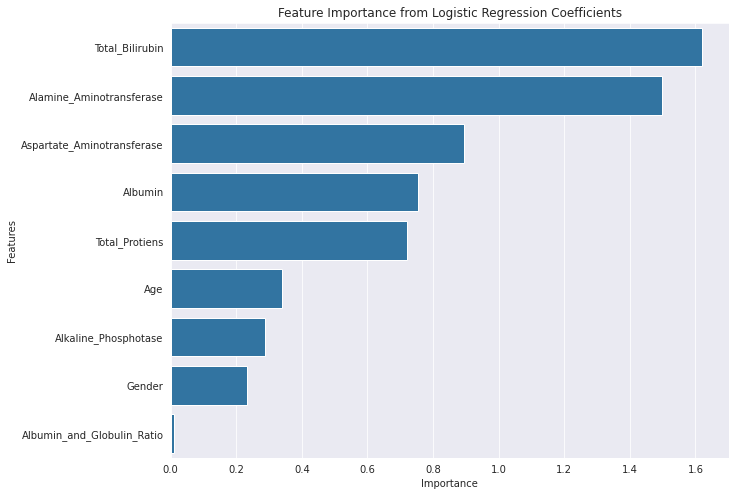

In [90]:
# Visualizando Através de Gráfico

# Gráfico de barras da importância das variáveis
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=df_importancias)
plt.title('Feature Importance from Logistic Regression Coefficients')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

#### Escolha das Variáveis

In [91]:
# Critério: Foi detectado uma disparidade entre as 5 primeiras e as outras 4 variáveis.
#           Vamos escolher as 5 primerias

# Pega os índices das 5 variáveis mais importantes
indices_importantes = np.argsort(-np.abs(coeficientes))[:5]  

# Supondo que as colunas em X_treino estão em ordem com os coeficientes
variaveis_importantes = X_treino.columns[indices_importantes]

#### Construindo e Treinando o Modelo com Variáveis Selecionadas

In [92]:
# Reduzindo os conjuntos de dados de treino e teste para as variáveis selecionadas
X_treino_reduzido = X_treino[variaveis_importantes]
X_teste_reduzido = X_teste[variaveis_importantes]

# Criando o modelo com os melhores hiperparâmetros encontrados anteriormente
modelo_v2_RL = LogisticRegression(
    C=best_params['logistic__C'], 
    penalty='l2', 
    max_iter=1000
)

# Treinamento do modelo
modelo_v2_RL.fit(X_treino_reduzido, y_treino)

LogisticRegression(C=1, max_iter=1000)

#### Realizando Previsões

In [93]:
y_pred_v2_RL = modelo_v2_RL.predict(X_teste_reduzido)
y_pred_proba_v2_RL = modelo_v2_RL.predict_proba(X_teste_reduzido)[:, 1]  # Probabilidades para a classe positiva

#### Avaliando o Modelo

In [94]:
roc_auc_v2_RL = roc_auc_score(y_teste, y_pred_v2_RL)
fpr_v2_RL, tpr_v2_RL, thresholds_v2 = roc_curve(y_teste, y_pred_proba_v2_RL)
auc_v2_RL = auc(fpr_v2_RL, tpr_v2_RL)
acuracia_v2_RL = accuracy_score(y_teste, y_pred_v2_RL)

print("Acurácia da Versão 2:", acuracia_v2_RL)

Acurácia da Versão 2: 0.6312056737588653


#### Adiciona o Resultado das Métricas a um Dicionário

In [95]:
# Dicionário com as métricas do modelo_v2
dict_modelo_v2_RL = {
    'Nome': 'modelo_v2_RL', 
    'Algoritmo': 'Regressão Logística com Variáveis Selecionadas',
    'ROC_AUC Score': roc_auc_v2_RL,
    'AUC Score': auc_v2_RL,
    'Acurácia': acuracia_v2_RL
}

#### Salvando o Modelo em Disco

In [96]:
with open('modelos/modelo_v2_RL.pkl', 'wb') as pickle_file:
    joblib.dump(modelo_v2_RL, pickle_file)

print("Modelo Versão 2 salvo com sucesso.")

Modelo Versão 2 salvo com sucesso.


<br>

### Salvando os Resultados em um Dataframe

In [97]:
# Lista de dicionários contendo as métricas dos modelos
modelos = [dict_modelo_v1_RL, dict_modelo_v2_RL]

# Convertendo lista de dicionários para DataFrame
modelos_df = pd.DataFrame(modelos)

# Concatena o novo DataFrame com o existente
df_modelos = pd.concat([df_modelos, modelos_df], ignore_index=True)

In [98]:
# Exibe o Dataframe
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1_RL,Regressão Logística,0.714233,0.740099,0.687943
1,modelo_v2_RL,Regressão Logística com Variáveis Selecionadas,0.659530,0.694059,0.631206


<br><br><br>

# Modelo 2 com Random Forest

- Nosso desafio agora é tentar obter um modelo **melhor que a versão 1**. Vamos tentar o algoritmo **Random Forest**.

<br>

<br>

## Versão 1
- Cria várias modelos com o **RandomizedSearchCV** para encontrar os **melhores hiperparâmetros**.
- Após a identificação do **melhor** modelo, o modelo final é treinado diretamente com a **RandomForestClassifier**, usando esses **hiperparâmetros** otimizados, para garantir um modelo eficiente e pronto para implementação prática.

<br>

### <u>Criando o Modelo</u>

<br>

#### Ajustando Configurações de Hiperparâmetros do Modelo

In [99]:
# Grid de hiperparâmetros
tuned_params_v1_RF = {'n_estimators': [100, 200, 300, 400, 500], 
                      'min_samples_split': [2, 5, 10], 
                      'min_samples_leaf': [1, 2, 4]}

#### Construindo e Treinando Modelos com RandomizedSearchCV

In [100]:
# Cria o modelo com RandomizedSearchCV para buscar a melhor combinação de hiperparâmetros
modelo = RandomizedSearchCV(RandomForestClassifier(), 
                               tuned_params_v1_RF, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs  = -1)

# Treina o modelo
modelo.fit(X_treino, y_treino)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='roc_auc')

#### Visualizando o melhor Modelo

In [101]:
# Extrai o melhor modelo
modelo.best_estimator_

RandomForestClassifier()

<br>

#### Construindo e Treinando o Modelo com RandomForestClassifier (usando os melhores parâmetros encontrados anteriormente)

In [102]:
# Extrai o melhor modelo e seus hiperparâmetros
best_rf = modelo.best_estimator_
best_params = best_rf.get_params()

# Recria o modelo com os melhores hiperparâmetros
modelo_v1_RF = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    bootstrap=best_params['bootstrap']
)

# Treinando o modelo final no conjunto de treino
modelo_v1_RF.fit(X_treino, y_treino)

RandomForestClassifier()

<br>

### Previsões

In [103]:
# Previsões com dados de teste
y_pred_v1_RF = modelo_v1_RF.predict(X_teste)
print('Previsões de Classe')
print(y_pred_v1_RF[:10])

print(80 * '-')

# Obtemos as previsões no formato de probabilidade para cada classe
y_pred_proba_v1_RF = modelo_v1_RF.predict_proba(X_teste)
print('Previsões de Probabilidade')
print(y_pred_proba_v1_RF[:10])

print(80 * '-')

# Obtemos as previsões no formato de probabilidade filtrando para a classe positiva (Calculo da Curva ROC)
y_pred_proba_v1_RF = modelo_v1_RF.predict_proba(X_teste)[:,1]
print('Previsões de Probabilidade para a Classe Positiva')
print(y_pred_proba_v1_RF[:10])

Previsões de Classe
[0 1 1 1 1 0 0 1 1 1]
--------------------------------------------------------------------------------
Previsões de Probabilidade
[[0.55 0.45]
 [0.46 0.54]
 [0.02 0.98]
 [0.17 0.83]
 [0.43 0.57]
 [0.64 0.36]
 [0.61 0.39]
 [0.07 0.93]
 [0.32 0.68]
 [0.08 0.92]]
--------------------------------------------------------------------------------
Previsões de Probabilidade para a Classe Positiva
[0.45 0.54 0.98 0.83 0.57 0.36 0.39 0.93 0.68 0.92]


<br>

### Avaliação do Modelo

In [104]:
# Matriz de confusão
confusion_matrix(y_teste, y_pred_v1_RF)

array([[17, 23],
       [16, 85]])

In [105]:
# Calculando a Acurácia em um Único Bloco

# Extraindo cada valor da Confusion Matrix
tn_RF, fp_RF, fn_RF, tp_RF = confusion_matrix(y_teste, y_pred_v1_RF).ravel()

# Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc_v1_RF = roc_auc_score(y_teste, y_pred_v1_RF)

# Calcula a curva ROC com dados e previsões em teste
fpr_v1_RF, tpr_v1_RF, thresholds = roc_curve(y_teste, y_pred_proba_v1_RF)

# AUC em teste
auc_v1_RF = auc(fpr_v1_RF, tpr_v1_RF)

# Acurácia em teste
acuracia_v1_RF = accuracy_score(y_teste, y_pred_v1_RF)
print(acuracia_v1_RF)

0.723404255319149


<br>

#### Adiciona o Resultado das Métricas a um Dicionário

In [106]:
# Dicionário com as métricas do modelo_v1
dict_modelo_v1_RF = {'Nome': 'modelo_v1_RF', 
                    'Algoritmo': 'Random Forest', 
                    'ROC_AUC Score': roc_auc_v1_RF,
                    'AUC Score': auc_v1_RF,
                    'Acurácia': acuracia_v1_RF}

#### Salvando o Modelo em Disco

In [107]:
# Salva o modelo em disco
with open('modelos/modelo_v1_RF.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v1_RF, 'modelos/modelo_v1_RF.pkl') 

<br>

## Versão 2
- Aplica a Técnica de **Feature Selection** no **modelo_v1** criado na **Versão 1**
- Re-cria o modelo utilizando as **5 variáveis mais importantes**

<br>

### <u>Criando o Modelo</u>

<br>

#### Aplicando Técnica de Feature Selection

In [108]:
# Extrair coeficientes do modelo
importancias = modelo_v1_RF.feature_importances_

# Criar DataFrame para visualização
features = X_treino.columns
df_importancias = pd.DataFrame({'Feature': features, 'Importance': importancias})
df_importancias = df_importancias.sort_values(by='Importance', ascending=False)

# Exibir importâncias
print('Visualizando Importância das Variáveis')
print(80*'-')
print(df_importancias)

Visualizando Importância das Variáveis
--------------------------------------------------------------------------------
                      Feature  Importance
2             Total_Bilirubin    0.204237
3        Alkaline_Phosphotase    0.146724
4    Alamine_Aminotransferase    0.124058
8  Albumin_and_Globulin_Ratio    0.121580
5  Aspartate_Aminotransferase    0.118744
6              Total_Protiens    0.090051
0                         Age    0.089010
7                     Albumin    0.083802
1                      Gender    0.021793


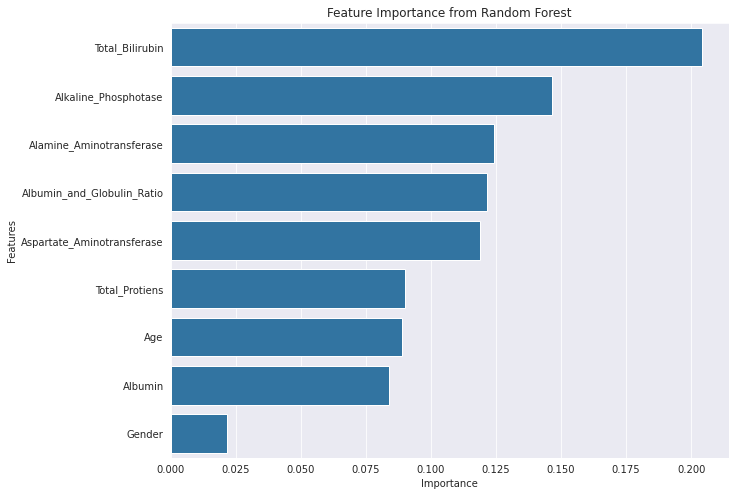

In [109]:
# Gráfico de barras da importância das variáveis
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=df_importancias)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

#### Construindo e Treinando o Modelo com Variáveis Selecionadas

In [110]:
# Reduzindo os conjuntos de dados de treino e teste para as variáveis selecionadas
X_treino_reduzido = X_treino[variaveis_importantes]
X_teste_reduzido = X_teste[variaveis_importantes]

# Criando o modelo com os melhores hiperparâmetros encontrados anteriormente
modelo_v2_RF = RandomForestClassifier(
    n_estimators=best_rf.get_params()['n_estimators'],
    min_samples_split=best_rf.get_params()['min_samples_split'],
    min_samples_leaf=best_rf.get_params()['min_samples_leaf'],
    max_features=best_rf.get_params()['max_features'],
    bootstrap=best_rf.get_params()['bootstrap']
)

# Treinamento do modelo com o conjunto de dados reduzido
modelo_v2_RF.fit(X_treino_reduzido, y_treino)

RandomForestClassifier()

<br>

### Previsões

In [111]:
# Previsões com dados de teste reduzido
y_pred_v2_RF = modelo_v2_RF.predict(X_teste_reduzido)
print('Previsões de Classe')
print(y_pred_v2_RF[:10])

print(80 * '-')

# Obtemos as previsões no formato de probabilidade para cada classe
y_pred_proba_v2_RF = modelo_v2_RF.predict_proba(X_teste_reduzido)
print('Previsões de Probabilidade')
print(y_pred_proba_v2_RF[:10])

print(80 * '-')

# Obtemos as previsões no formato de probabilidade filtrando para a classe positiva (Cálculo da Curva ROC)
y_pred_proba_v2_RF = modelo_v2_RF.predict_proba(X_teste_reduzido)[:, 1]
print('Previsões de Probabilidade para a Classe Positiva')
print(y_pred_proba_v2_RF[:10])

Previsões de Classe
[1 1 1 1 1 0 0 1 0 1]
--------------------------------------------------------------------------------
Previsões de Probabilidade
[[0.44 0.56]
 [0.49 0.51]
 [0.04 0.96]
 [0.26 0.74]
 [0.41 0.59]
 [0.58 0.42]
 [0.66 0.34]
 [0.27 0.73]
 [0.54 0.46]
 [0.02 0.98]]
--------------------------------------------------------------------------------
Previsões de Probabilidade para a Classe Positiva
[0.56 0.51 0.96 0.74 0.59 0.42 0.34 0.73 0.46 0.98]


<br>

### Avaliação do Modelo

In [112]:
# Matriz de confusão
conf_matrix_v2_RF = confusion_matrix(y_teste, y_pred_v2_RF)
print('Matriz de Confusão')
print(conf_matrix_v2_RF)

Matriz de Confusão
[[22 18]
 [21 80]]


In [113]:
# Calculando a Acurácia em um Único Bloco
tn, fp, fn, tp = conf_matrix_v2_RF.ravel()

# Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc_v2_RF = roc_auc_score(y_teste, y_pred_v2_RF)

# Calcula a curva ROC com dados e previsões em teste
fpr_v2_RF, tpr_v2_RF, thresholds_v2_RF = roc_curve(y_teste, y_pred_proba_v2_RF)

# AUC em teste
auc_v2_RF = auc(fpr_v2_RF, tpr_v2_RF)

# Acurácia em teste
acuracia_v2_RF = accuracy_score(y_teste, y_pred_v2_RF)
print(f'Acurácia: {acuracia_v2_RF}')
print(f'ROC AUC Score: {roc_auc_v2_RF}')
print(f'AUC da Curva ROC: {auc_v2_RF}')

Acurácia: 0.723404255319149
ROC AUC Score: 0.6710396039603961
AUC da Curva ROC: 0.7332920792079207


<br>

#### Adiciona o Resultado das Métricas a um Dicionário

In [114]:
# Adiciona o Resultado das Métricas a um Dicionário
dict_modelo_v2_RF = {
    'Nome': 'modelo_v2_RF',
    'Algoritmo': 'Random Forest com Variáveis Selecionadas',
    'ROC_AUC Score': roc_auc_v2_RF,
    'AUC Score': auc_v2_RF,
    'Acurácia': acuracia_v2_RF
}

#### Salvando o Modelo em Disco

In [115]:
with open('modelos/modelo_v2_RF.pkl', 'wb') as pickle_file:
    joblib.dump(modelo_v2_RF, 'modelos/modelo_v2_RF.pkl')

print("Modelo salvo com sucesso!")

Modelo salvo com sucesso!


<br>

### Salvando os Resultados em um Dataframe

In [116]:
# Lista de dicionários contendo as métricas dos modelos
modelos = [dict_modelo_v1_RF, dict_modelo_v2_RF]

# Convertendo lista de dicionários para DataFrame
modelos_df = pd.DataFrame(modelos)

# Concatena o novo DataFrame com o existente
df_modelos = pd.concat([df_modelos, modelos_df], ignore_index=True)

In [117]:
# Exibe o Dataframe
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1_RL,Regressão Logística,0.714233,0.740099,0.687943
1,modelo_v2_RL,Regressão Logística com Variáveis Selecionadas,0.659530,0.694059,0.631206
2,modelo_v1_RF,Random Forest,0.633292,0.735149,0.723404
3,modelo_v2_RF,Random Forest com Variáveis Selecionadas,0.671040,0.733292,0.723404


<br><br><br>

# Modelo 3 com KNN

- Vamos tentar agora um algoritmo mais **simples**, o **KNN**.
- Para esse algoritmo precisamos antes definir o **valor de K**, que é o **número de vizinhos mais próximos**.

<br>

## Versão 1
- Com o algoritmo KNN **não extraímos as variáveis mais importantes**, pois o conceito do algoritmo é diferente.
- Será criado apenas **1 versão**.

### <u>Criando o Modelo</u>

<br>

#### Construindo o Algoritmo

In [118]:
# Lista de possíveis valores de K
vizinhos = list(range(1, 20, 2))

# Lista para os scores
cv_scores = []

# Validação cruzada para determinar o melhor valor de k
for k in vizinhos:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_treino, y_treino, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())  
    
# Ajustando o erro de classificação
erro = [1 - x for x in cv_scores]

# Determinando o melhor valor de k (com menor erro)
optimal_k = vizinhos[erro.index(min(erro))]
print('O valor ideal de k é %d' % optimal_k)

# Criamos o modelo versão 3
modelo_KNN = KNeighborsClassifier(n_neighbors = optimal_k)

O valor ideal de k é 1


<br>

#### Treinando o Algoritmo

In [119]:
# Treinamento
modelo_KNN.fit(X_treino, y_treino)

KNeighborsClassifier(n_neighbors=1)

<br>

### Previsões

In [120]:
# Previsões com dados de teste
y_pred_KNN = modelo_KNN.predict(X_teste)
print('Previsões de Classe')
print(y_pred_KNN[:10])

print(80 * '-')

# Obtemos as previsões no formato de probabilidade para cada classe
y_pred_proba_KNN = modelo_KNN.predict_proba(X_teste)
print('Previsões de Probabilidade')
print(y_pred_proba_KNN[:10])

print(80 * '-')

# Obtemos as previsões no formato de probabilidade filtrando para a classe positiva (Calculo da Curva ROC)
y_pred_proba_KNN = modelo_KNN.predict_proba(X_teste)[:,1]
print('Previsões de Probabilidade para a Classe Positiva')
print(y_pred_proba_KNN[:10])

Previsões de Classe
[1 1 1 1 1 0 1 1 1 1]
--------------------------------------------------------------------------------
Previsões de Probabilidade
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
--------------------------------------------------------------------------------
Previsões de Probabilidade para a Classe Positiva
[1. 1. 1. 1. 1. 0. 1. 1. 1. 1.]


<br>

### Avaliação do Modelo

In [121]:
# Matriz de confusão
conf_matrix_KNN = confusion_matrix(y_teste, y_pred_KNN)
print('Matriz de Confusão')
print(conf_matrix_KNN)

Matriz de Confusão
[[17 23]
 [39 62]]


In [122]:
# Calculando a Acurácia em um Único Bloco
tn, fp, fn, tp = conf_matrix_KNN.ravel()

# Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc_KNN = roc_auc_score(y_teste, y_pred_KNN)

# Calcula a curva ROC com dados e previsões em teste
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_teste, y_pred_proba_KNN)

# AUC em teste
auc_KNN = auc(fpr_KNN, tpr_KNN)

# Acurácia em teste
acuracia_KNN = accuracy_score(y_teste, y_pred_KNN)
print(f'Acurácia: {acuracia_KNN}')
print(f'ROC AUC Score: {roc_auc_KNN}')
print(f'AUC da Curva ROC: {auc_KNN}')

Acurácia: 0.5602836879432624
ROC AUC Score: 0.519430693069307
AUC da Curva ROC: 0.519430693069307


<br>

#### Adiciona o Resultado das Métricas a um Dicionário

In [123]:
# Dicionário com as métricas do modelo_v1
dict_modelo_KNN = {'Nome': 'modelo_KNN', 
                  'Algoritmo': 'KNN', 
                  'ROC_AUC Score': roc_auc_KNN,
                  'AUC Score': auc_KNN,
                  'Acurácia': acuracia_KNN}

#### Salvando o Modelo em Disco

In [124]:
# Salva o modelo em disco
with open('modelos/modelo_KNN.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_KNN, 'modelos/modelo_KNN.pkl')

print("Modelo salvo com sucesso!")

Modelo salvo com sucesso!


<br>

### Salvando os Resultados em um Dataframe

In [125]:
# Lista de dicionários contendo as métricas dos modelos
modelos = [dict_modelo_KNN]

# Convertendo lista de dicionários para DataFrame
modelos_df = pd.DataFrame(modelos)

# Concatena o novo DataFrame com o existente
df_modelos = pd.concat([df_modelos, modelos_df], ignore_index=True)

In [126]:
# Exibe o Dataframe
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1_RL,Regressão Logística,0.714233,0.740099,0.687943
1,modelo_v2_RL,Regressão Logística com Variáveis Selecionadas,0.659530,0.694059,0.631206
2,modelo_v1_RF,Random Forest,0.633292,0.735149,0.723404
3,modelo_v2_RF,Random Forest com Variáveis Selecionadas,0.671040,0.733292,0.723404
4,modelo_KNN,KNN,0.519431,0.519431,0.560284


<br><br><br>

# Modelo 4 com Decision Tree

- Na **versão 4** do modelo usaremos um modelo de **árvore de decisão**.

<br>

<br>

## Versão 1
- Cria várias modelos com o **RandomizedSearchCV** para encontrar os **melhores hiperparâmetros**.
- Após a identificação do **melhor modelo**, o modelo final é treinado diretamente com a **DecisionTreeClassifier**, usando esses hiperparâmetros otimizados, para garantir um modelo eficiente e pronto para implementação prática.

<br><br>

### <u>Criando o Modelo</u>

<br>

#### Ajustando Configurações de Hiperparâmetros do Modelo

In [127]:
# Hiperparâmetros
tuned_params_DT = {'min_samples_split': [2, 3, 4, 5, 7], 
                   'min_samples_leaf': [1, 2, 3, 4, 6], 
                   'max_depth': [2, 3, 4, 5, 6, 7]}

#### Cria modelos com RandomizedSearchCV para buscar a melhor combinação de hiperparâmetros

In [128]:
# Cria o modelo com RandomizedSearchCV
modelo_DT = RandomizedSearchCV(DecisionTreeClassifier(), 
                               tuned_params_DT, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs = -1)

#### Treina o modelo

In [129]:
# Treinamento
modelo_DT.fit(X_treino, y_treino)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 6],
                                        'min_samples_split': [2, 3, 4, 5, 7]},
                   scoring='roc_auc')

In [130]:
# Melhor modelo
modelo_DT.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4)

#### Construindo e Treinando o Modelo com DecisionTreeClassifier (usando os melhores parâmetros encontrados anteriormente

In [131]:
# Recriando o modelo
modelo_v1_DT = DecisionTreeClassifier(min_samples_split = 4, min_samples_leaf = 2, max_depth = 6)
modelo_v1_DT.fit(X_treino, y_treino)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=4)

<br>

### Previsões

In [132]:
# Previsões com dados de teste
y_pred_v1_DT = modelo_v1_DT.predict(X_teste)
print('Previsões de Classe')
print(y_pred_v1_DT[:10])

print(80 * '-')

# Obtemos as previsões no formato de probabilidade para cada classe
y_pred_proba_v1_DT = modelo_v1_DT.predict_proba(X_teste)
print('Previsões de Probabilidade')
print(y_pred_proba_v1_DT[:10])

print(80 * '-')

# Obtemos as previsões no formato de probabilidade filtrando para a classe positiva (Calculo da Curva ROC)
y_pred_proba_v1_DT = modelo_v1_DT.predict_proba(X_teste)[:,1]
print('Previsões de Probabilidade para a Classe Positiva')
print(y_pred_proba_v1_DT[:10])

Previsões de Classe
[0 0 1 1 0 1 0 1 0 1]
--------------------------------------------------------------------------------
Previsões de Probabilidade
[[0.69014085 0.30985915]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.42857143 0.57142857]
 [1.         0.        ]
 [0.         1.        ]
 [0.66666667 0.33333333]
 [0.08       0.92      ]]
--------------------------------------------------------------------------------
Previsões de Probabilidade para a Classe Positiva
[0.30985915 0.         1.         1.         0.         0.57142857
 0.         1.         0.33333333 0.92      ]


<br>

### Avaliação do Modelo

In [133]:
# Matriz de confusão
confusion_matrix(y_teste, y_pred_v1_DT)

array([[27, 13],
       [35, 66]])

In [134]:
# Calculando a Acurácia em um Único Bloco

# Extraindo cada valor da Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_teste, y_pred_v1_DT).ravel()

# Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc_v1_DT = roc_auc_score(y_teste, y_pred_v1_DT)

# Calcula a curva ROC com dados e previsões em teste
fpr_v1_DT, tpr_v1_DT, thresholds = roc_curve(y_teste, y_pred_proba_v1_DT)

# AUC em teste
auc_v1_DT = auc(fpr_v1_DT, tpr_v1_DT)

# Acurácia em teste
acuracia_v1_DT = accuracy_score(y_teste, y_pred_v1_DT)
print(acuracia_v1_DT)

0.6595744680851063


<br>

#### Adiciona o Resultado das Métricas a um Dicionário

In [135]:
# Dicionário com as métricas do modelo_v1_DT
dict_modelo_v1_DT = {'Nome': 'modelo_v1_DT', 
                     'Algoritmo': 'Decision Tree', 
                     'ROC_AUC Score': roc_auc_v1_DT,
                     'AUC Score': auc_v1_DT,
                     'Acurácia': acuracia_v1_DT}

<br>

#### Salvando o Modelo em Disco

In [136]:
# Salva o modelo em disco
with open('modelos/modelo_v1_DT.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v1_DT, 'modelos/modelo_v1_DT.pkl') 
        
print('Modelo salvo com sucesso!')

Modelo salvo com sucesso!


<br>

## Versão 2
- Aplica a Técnica de **Feature Selection** no **modelo_v4** criado na **Versão 1**
- Re-cria o modelo utilizando as **5 variáveis mais importantes**

<br>

### <u>Criando o Modelo</u>

<br>

#### Aplicando Técnica de Feature Selection

In [137]:
# Extrair coeficientes do modelo
importancias = modelo_v1_DT.feature_importances_

# Criar DataFrame para visualização
features = X_treino.columns
df_importancias = pd.DataFrame({'Feature': features, 'Importance': importancias})
df_importancias = df_importancias.sort_values(by='Importance', ascending=False)

# Exibir importâncias
print('Visualizando Importância das Variáveis')
print(80*'-')
print(df_importancias.head())

Visualizando Importância das Variáveis
--------------------------------------------------------------------------------
                      Feature  Importance
2             Total_Bilirubin    0.512249
3        Alkaline_Phosphotase    0.142148
8  Albumin_and_Globulin_Ratio    0.086205
4    Alamine_Aminotransferase    0.068994
5  Aspartate_Aminotransferase    0.060700


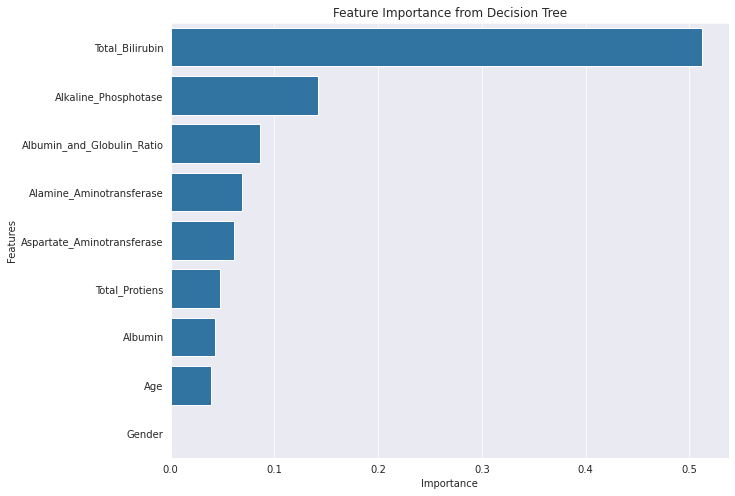

In [138]:
# Gráfico de barras da importância das variáveis
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=df_importancias)
plt.title('Feature Importance from Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

#### Construindo e Treinando o Modelo com Variáveis Selecionadas

In [139]:
# Supondo que 'variaveis_importantes' são as top 5 variáveis
variaveis_importantes = df_importancias['Feature'].head(5).tolist()
X_treino_reduzido = X_treino[variaveis_importantes]
X_teste_reduzido = X_teste[variaveis_importantes]

# Recriar o modelo com os melhores hiperparâmetros encontrados anteriormente
modelo_v2_DT = DecisionTreeClassifier(
    min_samples_split=4,
    min_samples_leaf=2,
    max_depth=6
)

# Treinamento do modelo com o conjunto de dados reduzido
modelo_v2_DT.fit(X_treino_reduzido, y_treino)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=4)

<br>

### Previsões

In [140]:
# Previsões com dados de teste reduzido
y_pred_v2_DT = modelo_v2_DT.predict(X_teste_reduzido)
print('Previsões de Classe')
print(y_pred_v2_DT[:10])

print(80 * '-')

# Obtemos as previsões no formato de probabilidade para cada classe
y_pred_proba_v2_DT = modelo_v2_DT.predict_proba(X_teste_reduzido)
print('Previsões de Probabilidade')
print(y_pred_proba_v2_DT[:10])

print(80 * '-')

# Obtemos as previsões no formato de probabilidade filtrando para a classe positiva (Cálculo da Curva ROC)
y_pred_proba_v2_DT = modelo_v2_DT.predict_proba(X_teste_reduzido)[:, 1]
print('Previsões de Probabilidade para a Classe Positiva')
print(y_pred_proba_v2_DT[:10])

Previsões de Classe
[0 0 1 1 0 0 1 1 0 1]
--------------------------------------------------------------------------------
Previsões de Probabilidade
[[0.5106383  0.4893617 ]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.5106383  0.4893617 ]
 [0.5106383  0.4893617 ]
 [0.         1.        ]
 [0.         1.        ]
 [0.66666667 0.33333333]
 [0.08       0.92      ]]
--------------------------------------------------------------------------------
Previsões de Probabilidade para a Classe Positiva
[0.4893617  0.         1.         1.         0.4893617  0.4893617
 1.         1.         0.33333333 0.92      ]


<br>

### Avaliação do Modelo

In [141]:
# Matriz de confusão
conf_matrix_v2_DT = confusion_matrix(y_teste, y_pred_v2_DT)
print('Matriz de Confusão')
print(conf_matrix_v2_DT)

Matriz de Confusão
[[29 11]
 [47 54]]


In [142]:
# Calculando a Acurácia em um Único Bloco
tn, fp, fn, tp = conf_matrix_v2_DT.ravel()

# Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc_v2_DT = roc_auc_score(y_teste, y_pred_v2_DT)

# Calcula a curva ROC com dados e previsões em teste
fpr_v2_DT, tpr_v2_DT, thresholds_v2_DT = roc_curve(y_teste, y_pred_proba_v2_DT)

# AUC em teste
auc_v2_DT = auc(fpr_v2_DT, tpr_v2_DT)

# Acurácia em teste
acuracia_v2_DT = accuracy_score(y_teste, y_pred_v2_DT)
print(f'Acurácia: {acuracia_v2_DT}')
print(f'ROC AUC Score: {roc_auc_v2_DT}')
print(f'AUC da Curva ROC: {auc_v2_DT}')

Acurácia: 0.5886524822695035
ROC AUC Score: 0.6298267326732674
AUC da Curva ROC: 0.6304455445544555


<br>

#### Adiciona o Resultado das Métricas a um Dicionário

In [143]:
# Dicionário com as métricas do modelo_v2_DT
dict_modelo_v2_DT = {'Nome': 'modelo_v2_DT', 
                    'Algoritmo': 'Decision Tree com Variáveis Selecionadas', 
                    'ROC_AUC Score': roc_auc_v2_DT,
                    'AUC Score': auc_v2_DT,
                    'Acurácia': acuracia_v2_DT}

<br>

#### Salvando o Modelo em Disco

In [144]:
with open('modelos/modelo_v2_DT.pkl', 'wb') as pickle_file:
    joblib.dump(modelo_v2_DT, 'modelos/modelo_v2_DT.pkl')

print("Modelo salvo com sucesso!")

Modelo salvo com sucesso!


<br>

### Salvando os Resultados em um Dataframe

In [145]:
# Lista de dicionários contendo as métricas dos modelos
modelos = [dict_modelo_v1_DT, dict_modelo_v2_DT]

# Convertendo lista de dicionários para DataFrame
modelos_df = pd.DataFrame(modelos)

# Concatena o novo DataFrame com o existente
df_modelos = pd.concat([df_modelos, modelos_df], ignore_index=True)

In [146]:
# Exibe o Dataframe
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1_RL,Regressão Logística,0.714233,0.740099,0.687943
1,modelo_v2_RL,Regressão Logística com Variáveis Selecionadas,0.659530,0.694059,0.631206
2,modelo_v1_RF,Random Forest,0.633292,0.735149,0.723404
3,modelo_v2_RF,Random Forest com Variáveis Selecionadas,0.671040,0.733292,0.723404
4,modelo_KNN,KNN,0.519431,0.519431,0.560284
5,modelo_v1_DT,Decision Tree,0.664233,0.679208,0.659574
6,modelo_v2_DT,Decision Tree com Variáveis Selecionadas,0.629827,0.630446,0.588652


<br><br><br>

# Modelo 5 com SVM

- Para a quinta e última versão do modelo usaremos SVM.

<br>

## Versão 1
- Será criado apenas **1 versão**.

### <u>Criando o Modelo</u>

<br>

#### Ajustando Configurações de Hiperparâmetros do Modelo

In [147]:
# Função para seleção de hiperparâmetros
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel = 'rbf'), param_grid, cv = nfolds)
    grid_search.fit(X_treino, y_treino)
    grid_search.best_params_
    return grid_search.best_params_

In [148]:
# Aplica a função
svc_param_selection(X_treino, y_treino, 5)

{'C': 10, 'gamma': 1}

In [149]:
# Cria o modelo com os melhores hiperparâmetros
modelo_SVM = SVC(C = 1, gamma = 1, probability = True)

#### Treina o modelo

In [150]:
# Treinamento
modelo_SVM.fit(X_treino, y_treino)

SVC(C=1, gamma=1, probability=True)

<br>

### Previsões

In [151]:
# Previsões com dados de teste
y_pred_SVM = modelo_SVM.predict(X_teste)
print('Previsões de Classe')
print(y_pred_SVM[:10])

print(80 * '-')

# Obtemos as previsões no formato de probabilidade para cada classe
y_pred_proba_SVM = modelo_SVM.predict_proba(X_teste)
print('Previsões de Probabilidade')
print(y_pred_proba_SVM[:10])

print(80 * '-')

# Obtemos as previsões no formato de probabilidade filtrando para a classe positiva (Calculo da Curva ROC)
y_pred_proba_SVM = modelo_SVM.predict_proba(X_teste)[:,1]
print('Previsões de Probabilidade para a Classe Positiva')
print(y_pred_proba_SVM[:10])

Previsões de Classe
[1 1 1 1 0 0 1 1 1 1]
--------------------------------------------------------------------------------
Previsões de Probabilidade
[[0.4470003  0.5529997 ]
 [0.17012171 0.82987829]
 [0.21680554 0.78319446]
 [0.21109202 0.78890798]
 [0.47827021 0.52172979]
 [0.51487363 0.48512637]
 [0.34258178 0.65741822]
 [0.17014818 0.82985182]
 [0.16362284 0.83637716]
 [0.21483092 0.78516908]]
--------------------------------------------------------------------------------
Previsões de Probabilidade para a Classe Positiva
[0.5529997  0.82987829 0.78319446 0.78890798 0.52172979 0.48512637
 0.65741822 0.82985182 0.83637716 0.78516908]


<br>

### Avaliação do Modelo

In [152]:
# Matriz de confusão
conf_matrix_SVM = confusion_matrix(y_teste, y_pred_SVM)
print('Matriz de Confusão')
print(conf_matrix_SVM)

Matriz de Confusão
[[17 23]
 [27 74]]


In [153]:
# Calculando a Acurácia em um Único Bloco
tn, fp, fn, tp = conf_matrix_SVM.ravel()

# Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc_SVM = roc_auc_score(y_teste, y_pred_SVM)

# Calcula a curva ROC com dados e previsões em teste
fpr_SVM, tpr_SVM, thresholds_SVM = roc_curve(y_teste, y_pred_proba_SVM)

# AUC em teste
auc_SVM = auc(fpr_SVM, tpr_SVM)

# Acurácia em teste
acuracia_SVM = accuracy_score(y_teste, y_pred_SVM)
print(f'Acurácia: {acuracia_SVM}')
print(f'ROC AUC Score: {roc_auc_SVM}')
print(f'AUC da Curva ROC: {auc_SVM}')

Acurácia: 0.6453900709219859
ROC AUC Score: 0.5788366336633664
AUC da Curva ROC: 0.6237623762376238


<br>

#### Adiciona o Resultado das Métricas a um Dicionário

In [154]:
# Dicionário com as métricas do modelo_v2_DT
dict_modelo_SVM = {'Nome': 'modelo_SVM', 
                   'Algoritmo': 'SVM', 
                   'ROC_AUC Score': roc_auc_SVM,
                   'AUC Score': auc_SVM,
                   'Acurácia': acuracia_SVM}

<br>

#### Salvando o Modelo em Disco

In [155]:
with open('modelos/modelo_SVM.pkl', 'wb') as pickle_file:
    joblib.dump(modelo_SVM, 'modelos/modelo_SVM.pkl')

print("Modelo salvo com sucesso!")

Modelo salvo com sucesso!


<br>

### Salvando os Resultados em um Dataframe

In [156]:
# Lista de dicionários contendo as métricas dos modelos
modelos = [dict_modelo_SVM]

# Convertendo lista de dicionários para DataFrame
modelos_df = pd.DataFrame(modelos)

# Concatena o novo DataFrame com o existente
df_modelos = pd.concat([df_modelos, modelos_df], ignore_index=True)

In [157]:
# Exibe o Dataframe
display(df_modelos)

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1_RL,Regressão Logística,0.714233,0.740099,0.687943
1,modelo_v2_RL,Regressão Logística com Variáveis Selecionadas,0.659530,0.694059,0.631206
2,modelo_v1_RF,Random Forest,0.633292,0.735149,0.723404
3,modelo_v2_RF,Random Forest com Variáveis Selecionadas,0.671040,0.733292,0.723404
4,modelo_KNN,KNN,0.519431,0.519431,0.560284
5,modelo_v1_DT,Decision Tree,0.664233,0.679208,0.659574
6,modelo_v2_DT,Decision Tree com Variáveis Selecionadas,0.629827,0.630446,0.588652
7,modelo_SVM,SVM,0.578837,0.623762,0.645390


<br><br><br><br>

# Seleção do Melhor Modelo

<br>

- Usaremos o modelo que teve o maior **AUC Score**, por se tratar de uma **métrica global**.
- O **AUC Score** é o ideal para comparar modelos de diferentes algoritmos.

<br>

#### Visualizando melhor modelo

In [158]:
# Selecionando e Visualizando Melhor Modelo
df_melhor_modelo = df_modelos[df_modelos['AUC Score'] == df_modelos['AUC Score'].max()]
df_melhor_modelo

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia
0,modelo_v1_RL,Regressão Logística,0.714233,0.740099,0.687943


<br><br>

## Previsões com o Melhor Modelo Treinado

<br>

#### Buscando Nome do Melhor Modelo

In [159]:
# Obtemos o nome do melhor modelo
modelo = df_melhor_modelo.Nome.to_string(index = False)
modelo

'modelo_v1_RL'

#### Carregamos o melhor modelo do disco

In [160]:
# Carregamos o melhor modelo do disco
melhor_modelo = joblib.load('modelos/' + modelo + '.pkl')
melhor_modelo

LogisticRegression(C=1, max_iter=1000)

<br> 

#### Criando Novos Dados Para Previsão

In [161]:
# Verificando Nome Das Colunas
dados.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Target'],
      dtype='object')

In [162]:
# Criando Dados brutos de um novo paciente (O número de colunas deve ser o mesmo do que foi usado em treino)
novo_paciente = [72, 1, 0.8, 186, 15, 29, 7.1, 3.4, 0.97]

<br>

#### Preparando os Novos Dados

In [163]:
# Converte o objeto para array
arr_paciente = np.array(novo_paciente)

In [164]:
# Usamos média e desvio de treino para padronizar novos dados
arr_paciente = (arr_paciente - treino_mean) / treino_std

In [165]:
# Converte novamente o objeto para array
arr_paciente = np.array(arr_paciente)

In [166]:
# Visualizando os Dados do paciente padronizados (exatamente como o modelo espera receber os dados)
arr_paciente

array([ 1.75409311,  1.91326314, -0.3331435 , -0.365003  , -0.33349645,
       -0.33915012,  0.56123653,  0.1842289 , -0.12101636])

<br>

### Previsões

In [167]:
# Previsões de classe
pred_novo_paciente = melhor_modelo.predict(arr_paciente.reshape(1, -1))

In [168]:
# Verifica o valor e imprime o resultado final
if pred_novo_paciente == 1:
    print('Este paciente deve apresentar doença hepática!')
else:
    print('Este paciente não deve apresentar doença hepática!')

Este paciente deve apresentar doença hepática!


<br><br><br><br><br><br><br><br><br><br>

## Separando Dados de Treino e Teste (Python X R)

<br>

### No R:
- É comum especificar a variável alvo diretamente nos modelos ou funções de treinamento. Por exemplo, ao usar o pacote **caret** ou funções nativas como **lm()** para regressão linear, você normalmente formula o modelo dentro da função, como em **lm(y ~ ., data = dados_treino)**, onde y é a variável alvo e . indica o uso de todas as outras variáveis no dataframe como preditores. 
- Isso significa que **não há necessidade estrita** de separar fisicamente a variável alvo das demais variáveis antes do treinamento do modelo.

<br>

### No Python:
- Ao usar bibliotecas como **scikit-learn**, você geralmente **precisa passar explicitamente** os arrays ou matrizes de características e a variável alvo separadamente para as funções de treinamento. Por exemplo, ao treinar um regressor logístico, você usaria algo como **LogisticRegression().fit(X_treino, y_treino)**. Aqui, X_treino e y_treino são passados como argumentos separados, o que requer que você prepare esses objetos com antecedência.
- Em Python, mesmo que você esteja usando uma biblioteca que permite formulações mais semelhantes ao R (como statsmodels), a **prática comum** e a maioria das APIs de machine learning ainda segue o padrão de passar X e y separadamente.

#### Por que isso é feito dessa forma em Python?
- A **separação explícita de X e y** fornece clareza e evita erros em um ecossistema que é menos integrado do que o R para análises estatísticas. As bibliotecas de Python, como **scikit-learn**, são projetadas para serem agnósticas quanto ao tipo de dados, permitindo o trabalho com arrays numpy, dataframes pandas, e outros formatos de dados, de uma maneira altamente modular e flexível. Além disso, essa separação ajuda na implementação de uma variedade de pré-processamentos e transformações de maneira mais controlada e sem risco de alterar inadvertidamente a variável alvo.

<br><br>

Essas diferenças refletem **filosofias de design distintas** e têm implicações práticas na maneira como você prepara e manipula dados para análises e modelagem em cada **linguagem**.

<br><br>
# FIM